<center> <h1>MSDS 7331 - Project 2</h1> </center>
<center> <h1>Johnson Ekedum, Ekaterina Pirogova, Victor Yim</h1> </center>
<center> <h2>10/29/2017</h2> </center>
<center> <h1>Classification methods</h1> </center>

Porto Seguro is auto insurance company located in Brazil. This is essential for a company to determine a person who is likely to initiate an auto insureance claim the next year. If the person is likely to initiate the claim he will be billed more to cover the claim's costs. If the person isn't going to initiate the claim next year the company doesn't want to charge more this person and this way to get more customers. For this reason we were presented with a data set containing 595212 records of the drivers insured by this company and 59 features for each record. This features include the record id, the target variable wich represents if the person submitted claim or not and various categorical and contineous features.

In [1]:
#improt libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl
import pylab
from pandas import Categorical
from sklearn.datasets import make_classification
import sklearn
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics as mt
from scipy.stats import boxcox
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from pandas.tools.plotting import boxplot
import seaborn as sns; sns.set(style="white", color_codes=True)
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "palettes")))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [30]:
#upload dataset
drivers=pd.read_csv('D:\OneDrive\Study\Kaggle\PortoSeguroSafeDriverPrediction/train.csv')
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
drivers.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

### Let's check missing values

In [32]:
# Replace missing values to NaN
drivers = drivers.replace(to_replace=-1,value=np.nan)
#Percent of missing values in dataset
missVal=drivers.isnull().sum()*100/len(drivers)
missVal.iloc[missVal.nonzero()]

ps_ind_02_cat     0.036290
ps_ind_04_cat     0.013945
ps_ind_05_cat     0.975955
ps_reg_03        18.106490
ps_car_01_cat     0.017977
ps_car_02_cat     0.000840
ps_car_03_cat    69.089837
ps_car_05_cat    44.782531
ps_car_07_cat     1.930237
ps_car_09_cat     0.095596
ps_car_11         0.000840
ps_car_12         0.000168
ps_car_14         7.160474
dtype: float64

From the description to the data set we know that variables ending on "cat" or "bin" are categorical. And the rest either contineous or ordianal.
From the visualizations below we can see that following variables are categorical:
binary:

ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin, ps_ind_04_cat, ps_car_02_cat, ps_car_03_cat, ps_car_05_cat, ps_car_07_cat, ps_car_08_cat

non-binary:

ps_ind_02_cat, ps_ind_05_cat, ps_car_01_cat, ps_car_04_cat, ps_car_06_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat

We assume that following features are contineous because they have floating point number type with long tail of numbers after the point. The contineous features are:

ps_reg_03, ps_car_12, ps_car_13, ps_car_14, ps_car_15

Ordinal features:

ps_reg_01, ps_reg_02, ps_ind_01, ps_ind_03, ps_ind_14, ps_ind_15, ps_car_11, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04,
ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14

### Let's have a look of what each variable represents:

#### target variable. 
This variable represents if the insurance claim was made.

col_0,Percent
target,
0,96.355248
1,3.644752


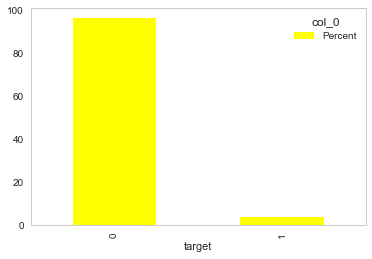

In [5]:
target_counts = pd.crosstab(index = drivers["target"], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
target_counts.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)
target_counts

We can see that our variable is highly unbalanced.

### Plot binary variables

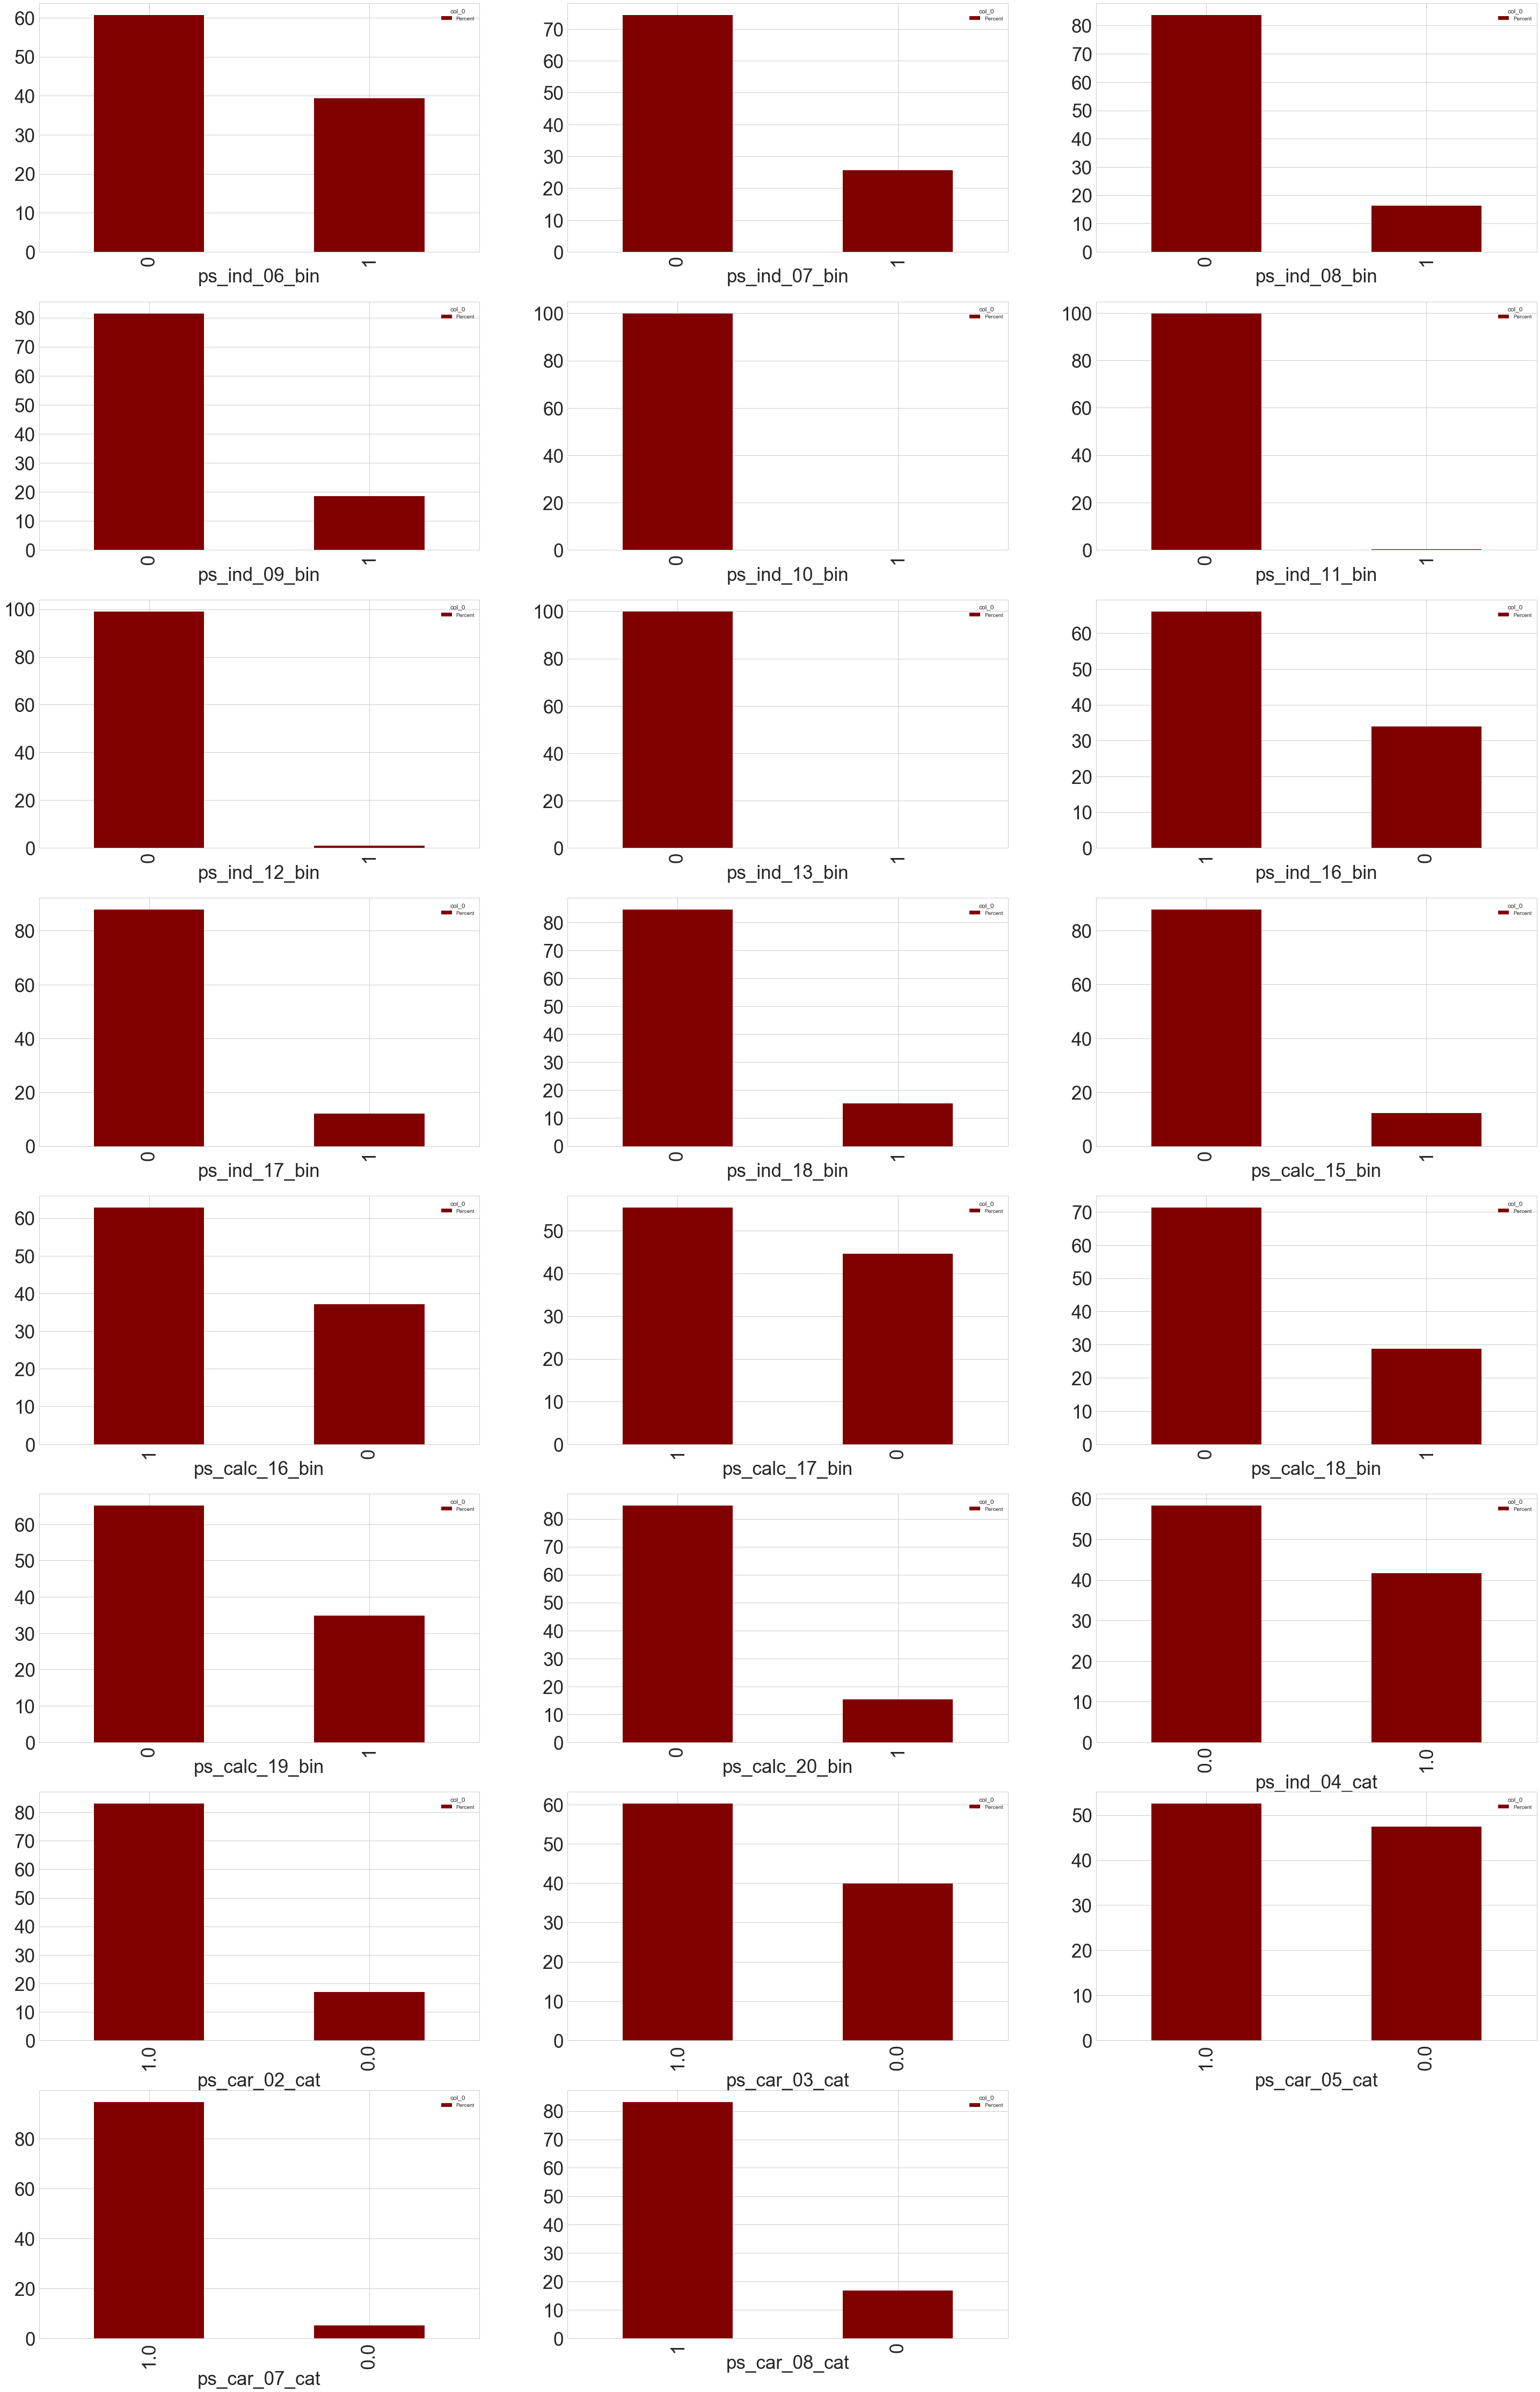

In [6]:
#plot binary variables
binary=['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
         'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
         'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin', 'ps_ind_04_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat', 
         'ps_car_07_cat', 'ps_car_08_cat']
fig=plt.figure(figsize=(50,80))
for i, plot_vars in enumerate(binary):
    ax=fig.add_subplot(8,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(index=drivers[plot_vars], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
    
    counts.plot.bar(color="maroon",ax=ax)
    #print(counts)
plt.show()


We see, that following variables are indeed binary. We can see that most of them are unbalanced and some of them extremely unbalanced.
Let's check the variation of target variable across levels of this variables.

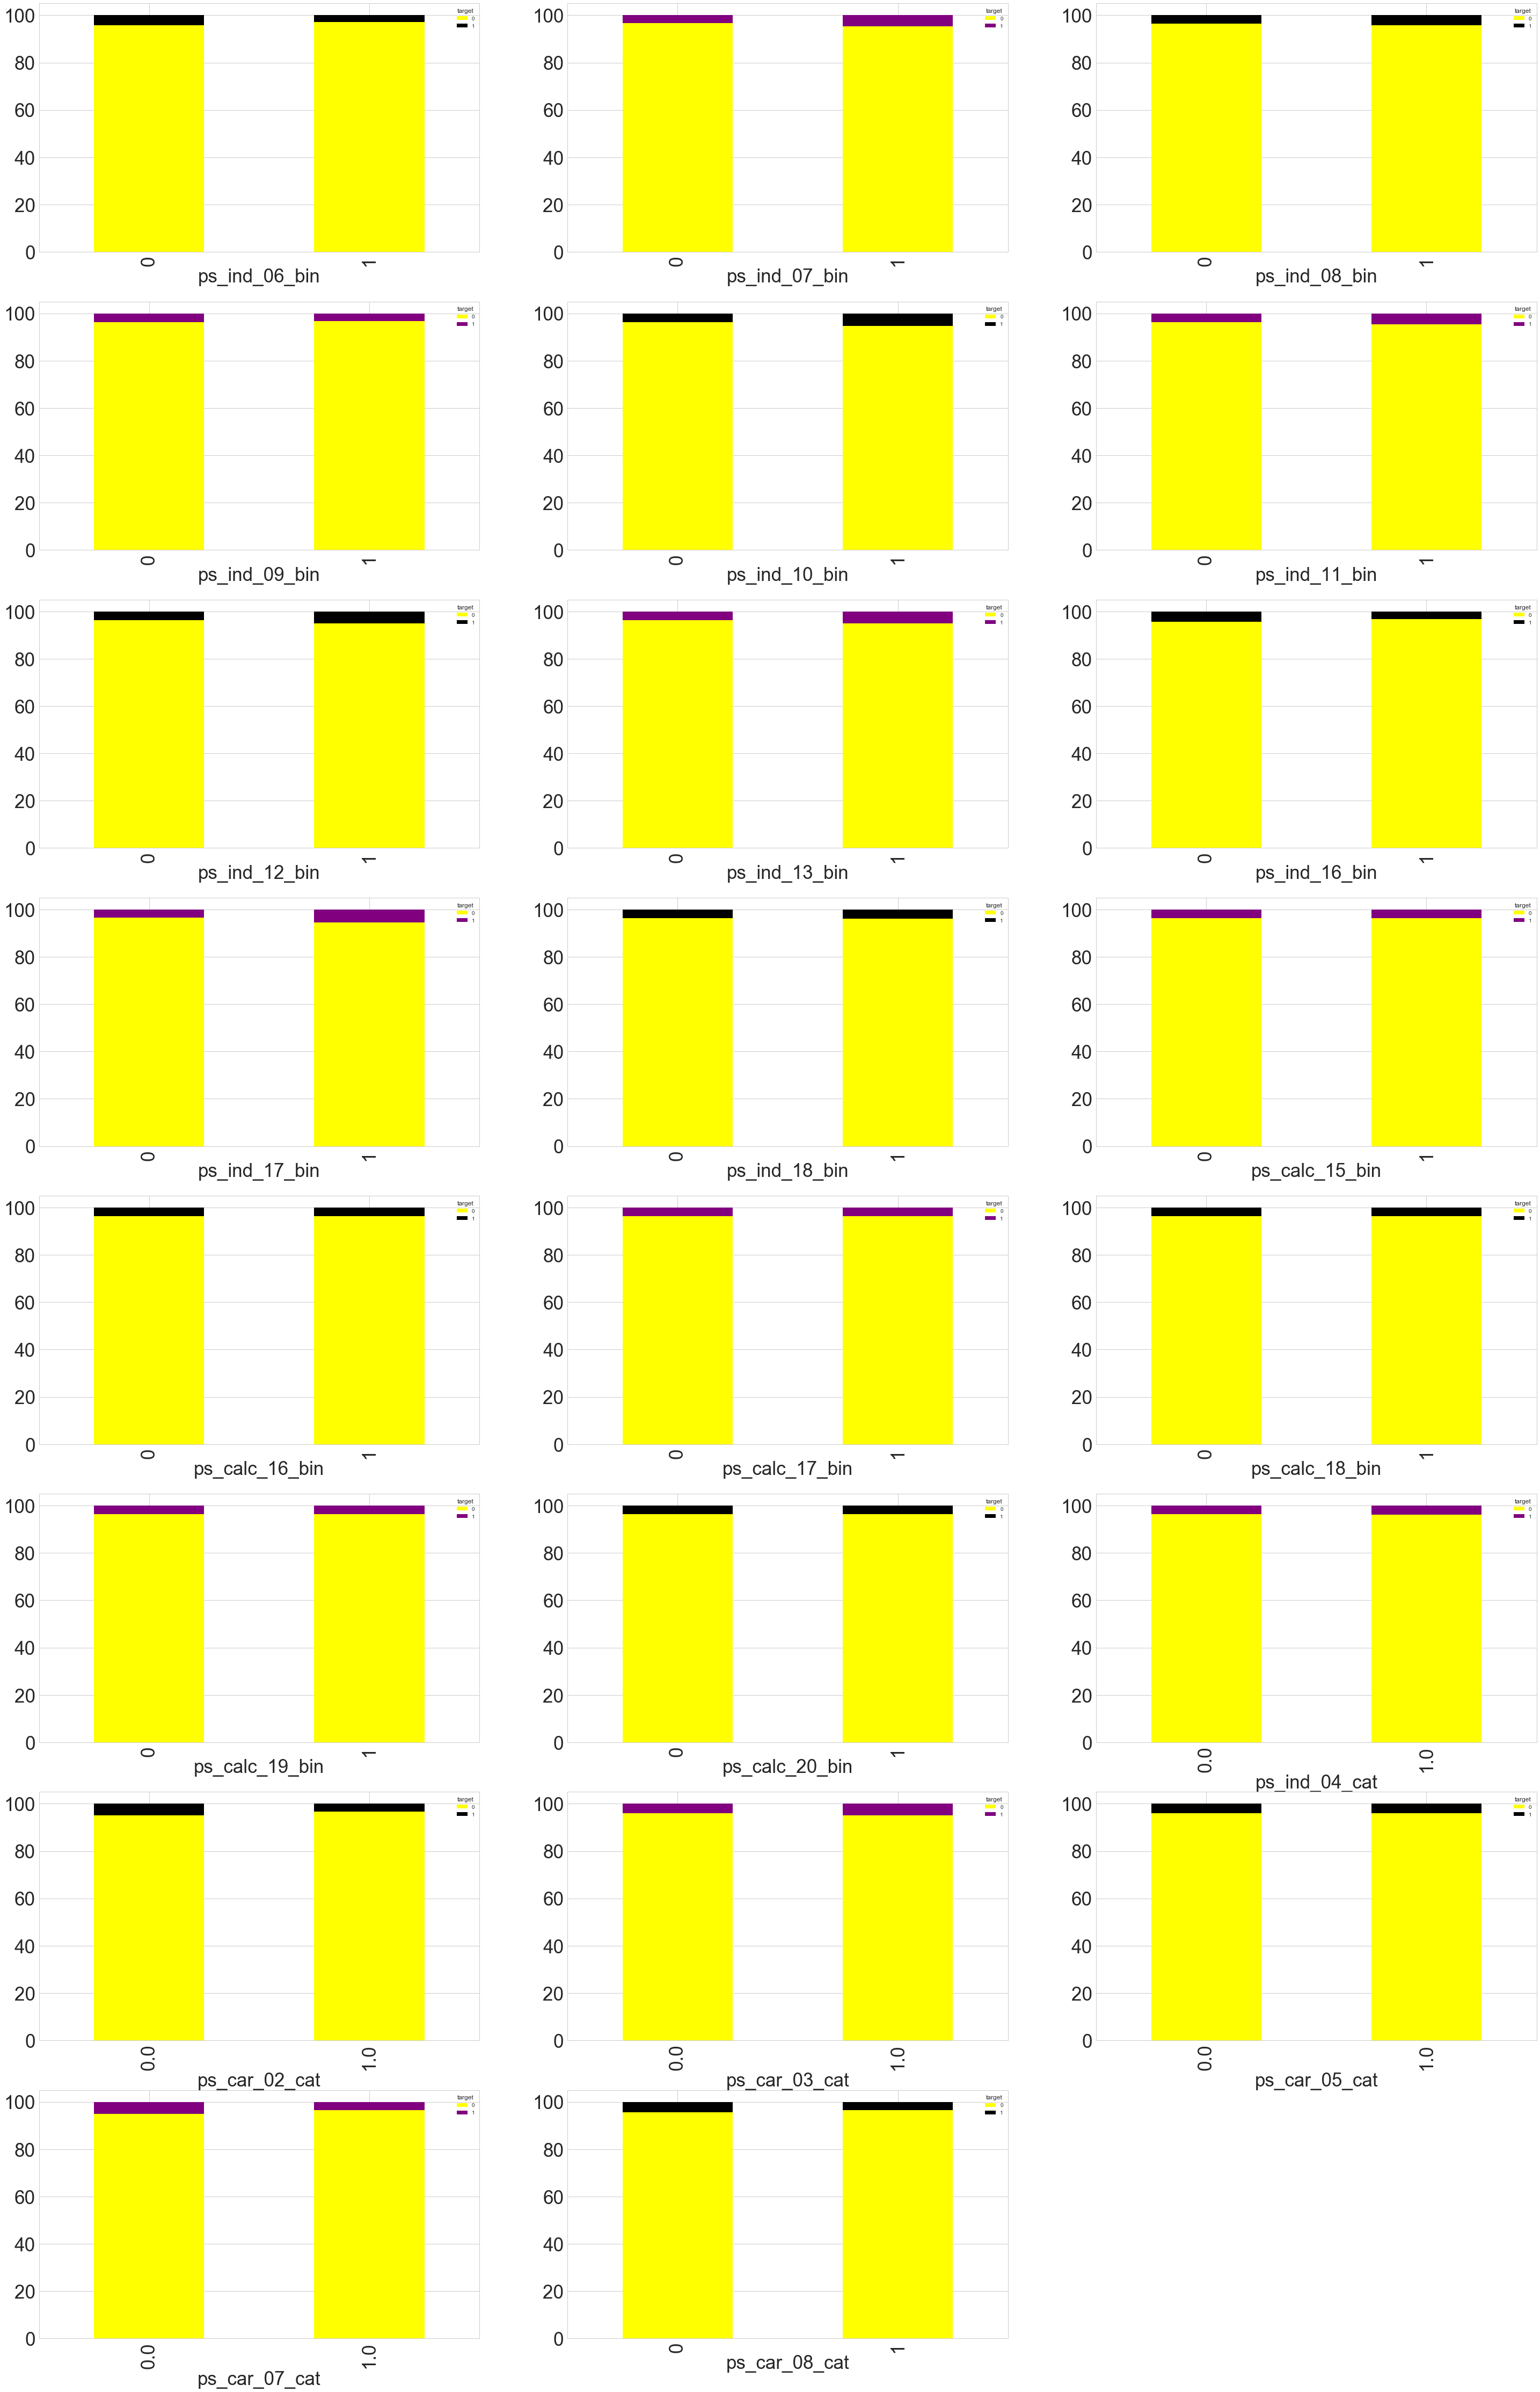

In [7]:
fig=plt.figure(figsize=(50,80))
count=[]
for i, plot_vars in enumerate(binary):
    ax=fig.add_subplot(8,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(drivers[plot_vars],drivers["target"]).apply(lambda r: r/r.sum()*100, axis=1)
    if i%2==0:
        counts.plot.bar(color=["yellow",'black'],stacked=True,ax=ax)
    else:
        counts.plot.bar(color=["yellow",'purple'],stacked=True,ax=ax)
    count.append(counts)
plt.show()

We can see that some variables have different number of claims across levels and some are not.
As an example ps_car_02_cat has more drivers making claim at the category 0, then in category 1. However, for ps_calc_20_bin number of claims from drivers doesn't vary much across categories.

Let's print the tables to see how much amount of claims varies across levels of variables.
For this work was used code from here:
https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side by Yasin Zähringer

In [8]:
from IPython.display import display,HTML

def multi_column_df_display(list_dfs, cols=3):
    html_table = "<table style='width:100%; border:0px'>{content}</table>"
    html_row = "<tr style='border:0px'>{content}</tr>"
    html_cell = "<td style='width:{width}%;vertical-align:top;border:0px'>{{content}}</td>"
    html_cell = html_cell.format(width=100/cols)

    cells = [ html_cell.format(content=df.to_html()) for df in list_dfs ]
    cells += (cols - (len(list_dfs)%cols)) * [html_cell.format(content="")] # pad
    rows = [ html_row.format(content="".join(cells[i:i+cols])) for i in range(0,len(cells),cols)]
    display(HTML(html_table.format(content="".join(rows))))


multi_column_df_display(count)

target,0,1
ps_ind_06_bin,,
0,95.841508,4.158492
1,97.146271,2.853729
target,0,1
ps_ind_07_bin,,
0,96.732418,3.267582
1,95.265019,4.734981
target,0,1
ps_ind_08_bin,,
0,96.464340,3.535660


From this tables we can see that this variables have variation in submitted claims to insurance companies and supposedly are usefull:
ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_ind_04_cat, ps_car_02_cat, ps_car_03_cat, ps_car_07_cat, ps_car_08_cat

This variables don't have much variation across levels and supposedly aren't usefull:

ps_ind_09_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin, ps_calc_15_bin, ps_car_05_cat

Variables ps_car_03_cat, ps_car_05_cat, ps_car_07_cat contain missing values.

ps_car_03_cat has about 69.1% of missing values, ps_car_05_cat - has about 44.78% of missing values, ps_ind_04_cat - has about 0.014% missing values and variable ps_car_07_cat has about 2% of missing values.

Variable ps_car_03_cat has some important variation. Because it has so many missing values we'll create a third category and call it "missing" for this variable. And see what kind of variation it will give us.

We will drop variable ps_car_05_cat. As we can see it has values across categories slightly above average for insurance claims, but it can be only because it missing so much data.

Variables ps_car_07_cat and ps_ind_04_cat have not much missing values so we will fill it randomly from non missing values of this variable.

In [9]:
#drop ps_car_05_cat
drivers.drop('ps_car_05_cat',axis=1, inplace = True)

In [10]:
#diab['weight_status'][diab['weight'].isnull()] ="Not measured"
drivers["ps_car_03_cat"]=drivers["ps_car_03_cat"].fillna('missing')

target,0,1
ps_car_03_cat,,
0.0,96.046239,3.953761
1.0,95.170221,4.829779
missing,96.729332,3.270668


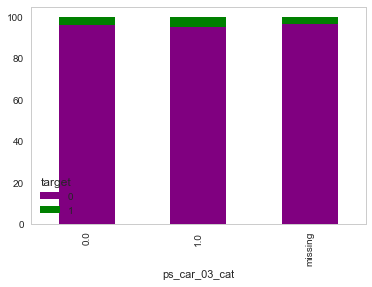

In [11]:
counts=pd.crosstab(drivers['ps_car_03_cat'],drivers["target"]).apply(lambda r: r/r.sum()*100, axis=1)
counts.plot(kind='bar', stacked=True, color=['purple','green'], grid=False)
counts

We can see that it variable has some variation and because we don't know the meaning of this variable we'll leave it in a dataset and decide if we need during feature selection.

In [12]:
drivers["ps_car_07_cat"]=drivers["ps_car_07_cat"].fillna(lambda x: random.choice(drivers[drivers["ps_car_07_cat"] != np.nan
                                                                                        ]["ps_car_07_cat"]), inplace=True)
drivers["ps_ind_04_cat"]=drivers["ps_ind_04_cat"].fillna(lambda x: random.choice(drivers[drivers["ps_ind_04_cat"] != np.nan
                                                                                        ]["ps_ind_04_cat"]), inplace=True)

### Plot categorical nominal variables

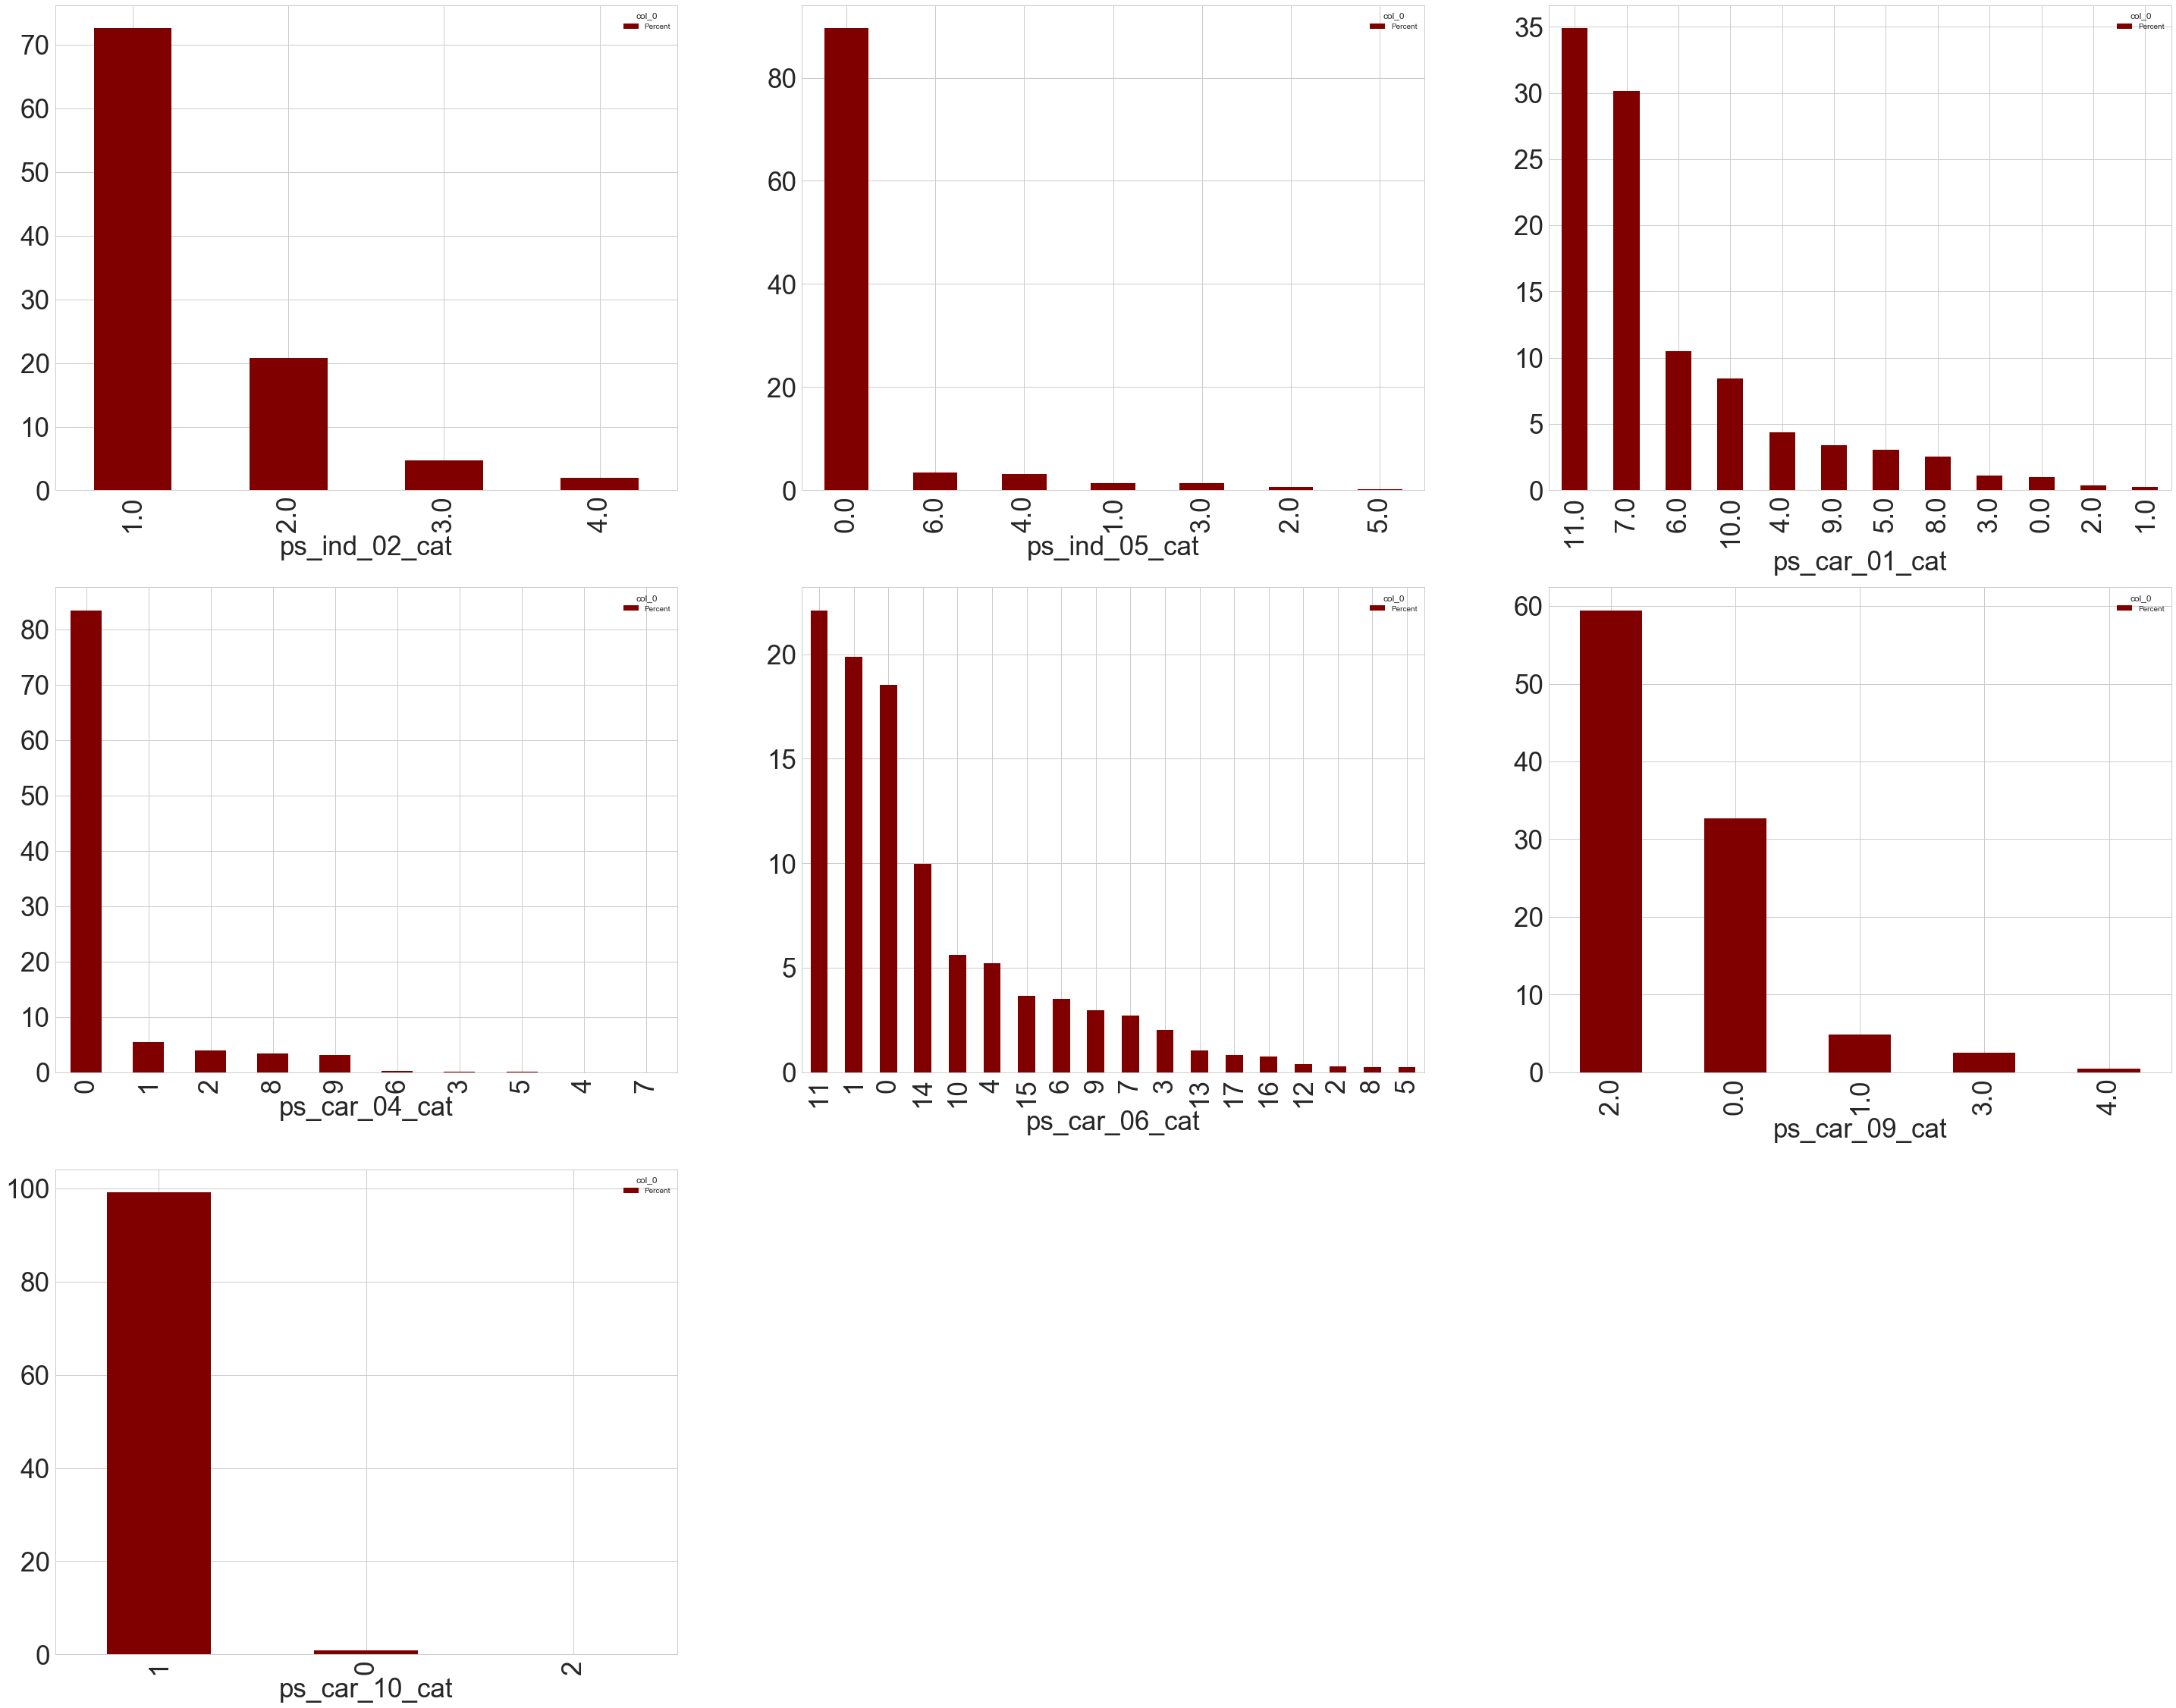

In [13]:
#plot nominal variables
cat=["ps_ind_02_cat", "ps_ind_05_cat", "ps_car_01_cat", "ps_car_04_cat", "ps_car_06_cat", "ps_car_09_cat", 
     "ps_car_10_cat"]
fig=plt.figure(figsize=(50,40))
for i, plot_vars in enumerate(cat):
    ax=fig.add_subplot(3,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(index=drivers[plot_vars], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
    
    counts.plot.bar(color="maroon",ax=ax)
    #print(counts)
plt.show()

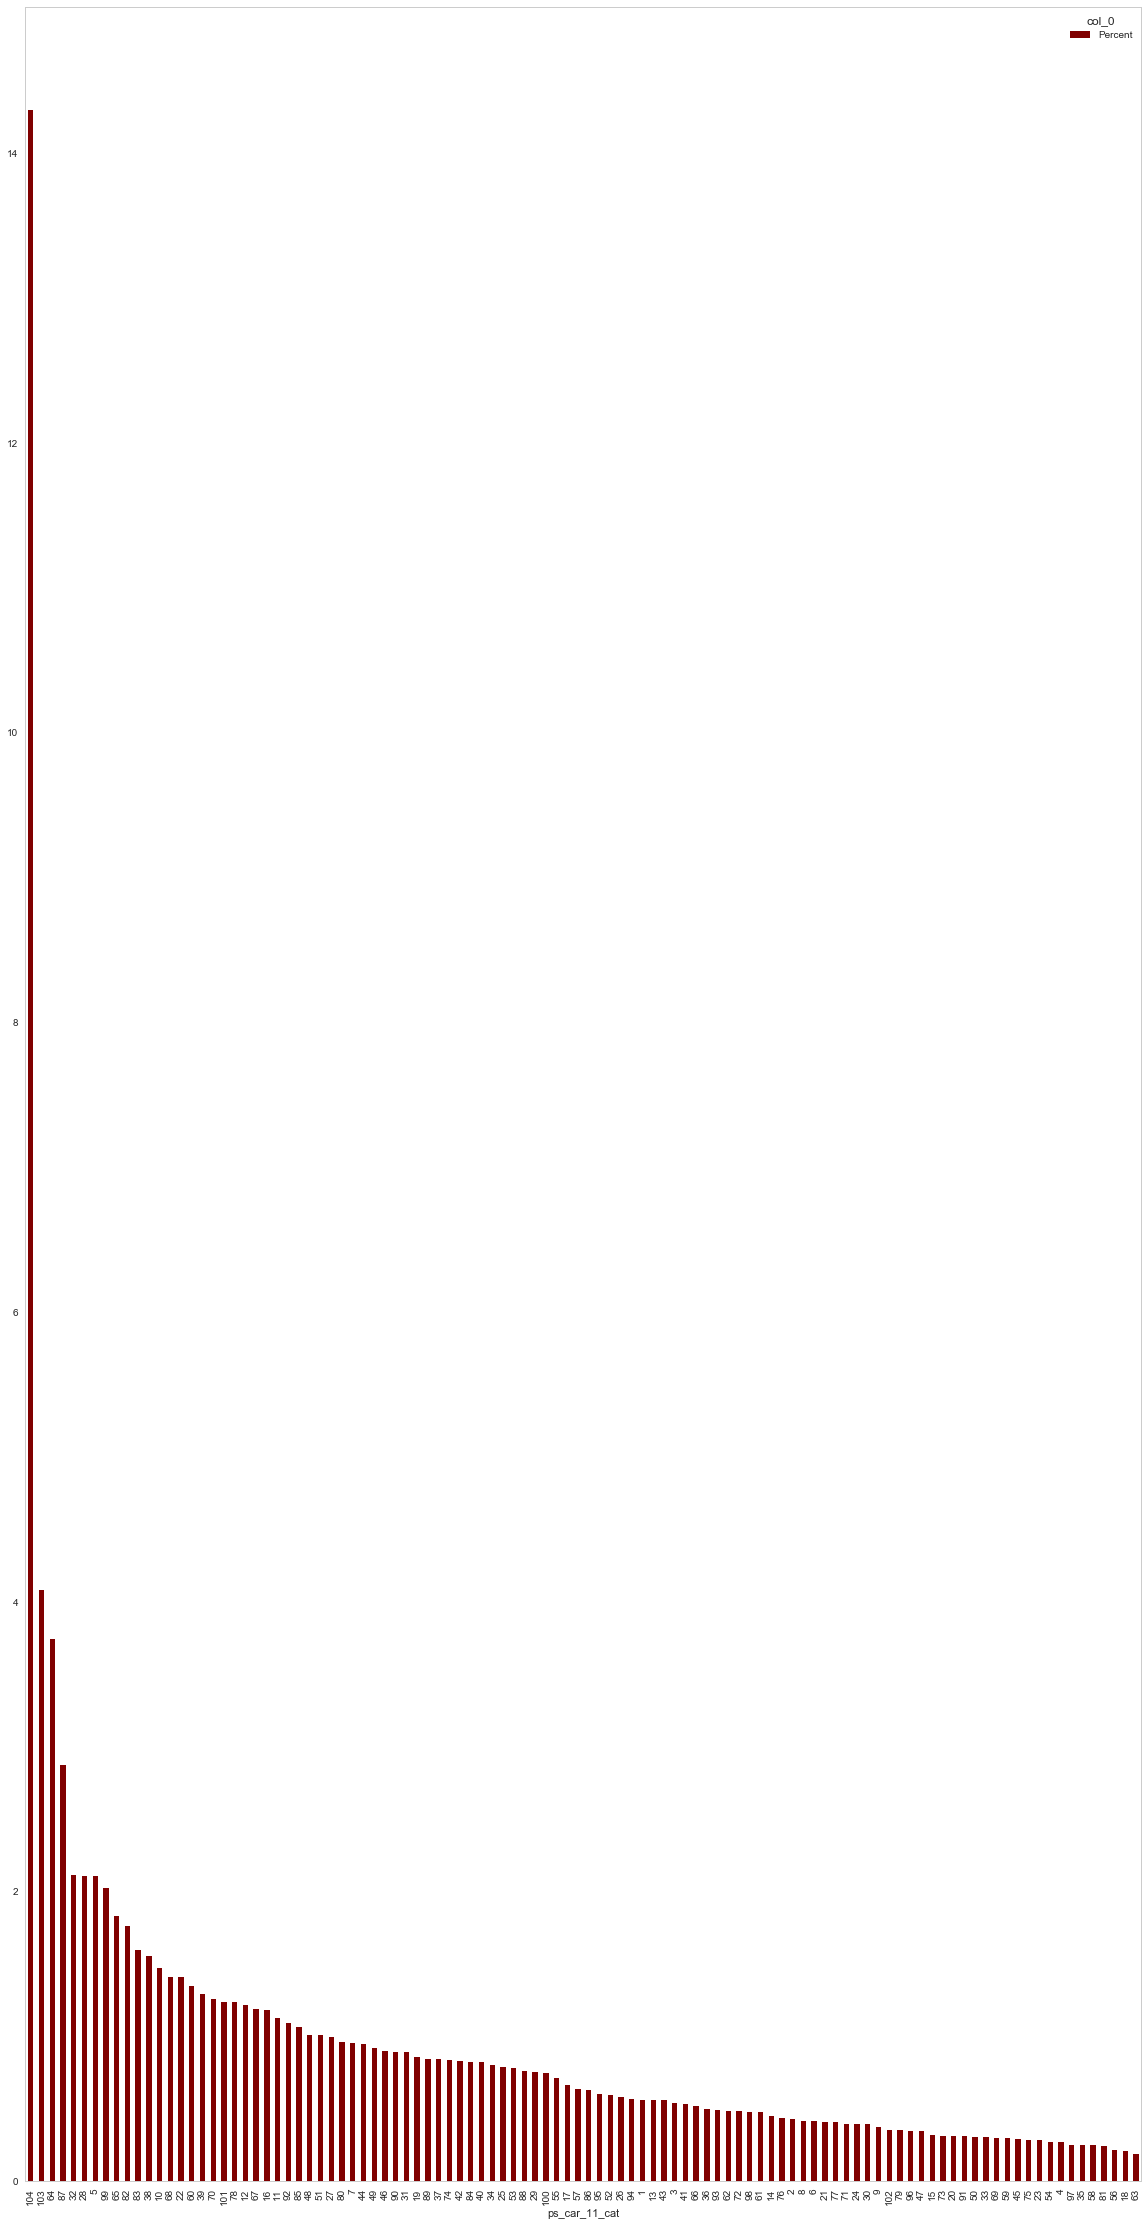

In [14]:
counts=pd.crosstab(index=drivers['ps_car_11_cat'], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
counts.plot(kind='bar', stacked=True, color=['maroon'], grid=False,figsize=(20,40))

We can see that most of categorical variables are highly unbalanced. ps_car_11_cat has enormous amount of levels.

Now, let's have a look at variation of target variable across categories of these variables.

We can see that this variable has 13 categories. With majority of records (10%) in category 7 and minority in category 1 (2%). But this is not heavely unbalanced.
Let's have a look how target variable varies across categories.

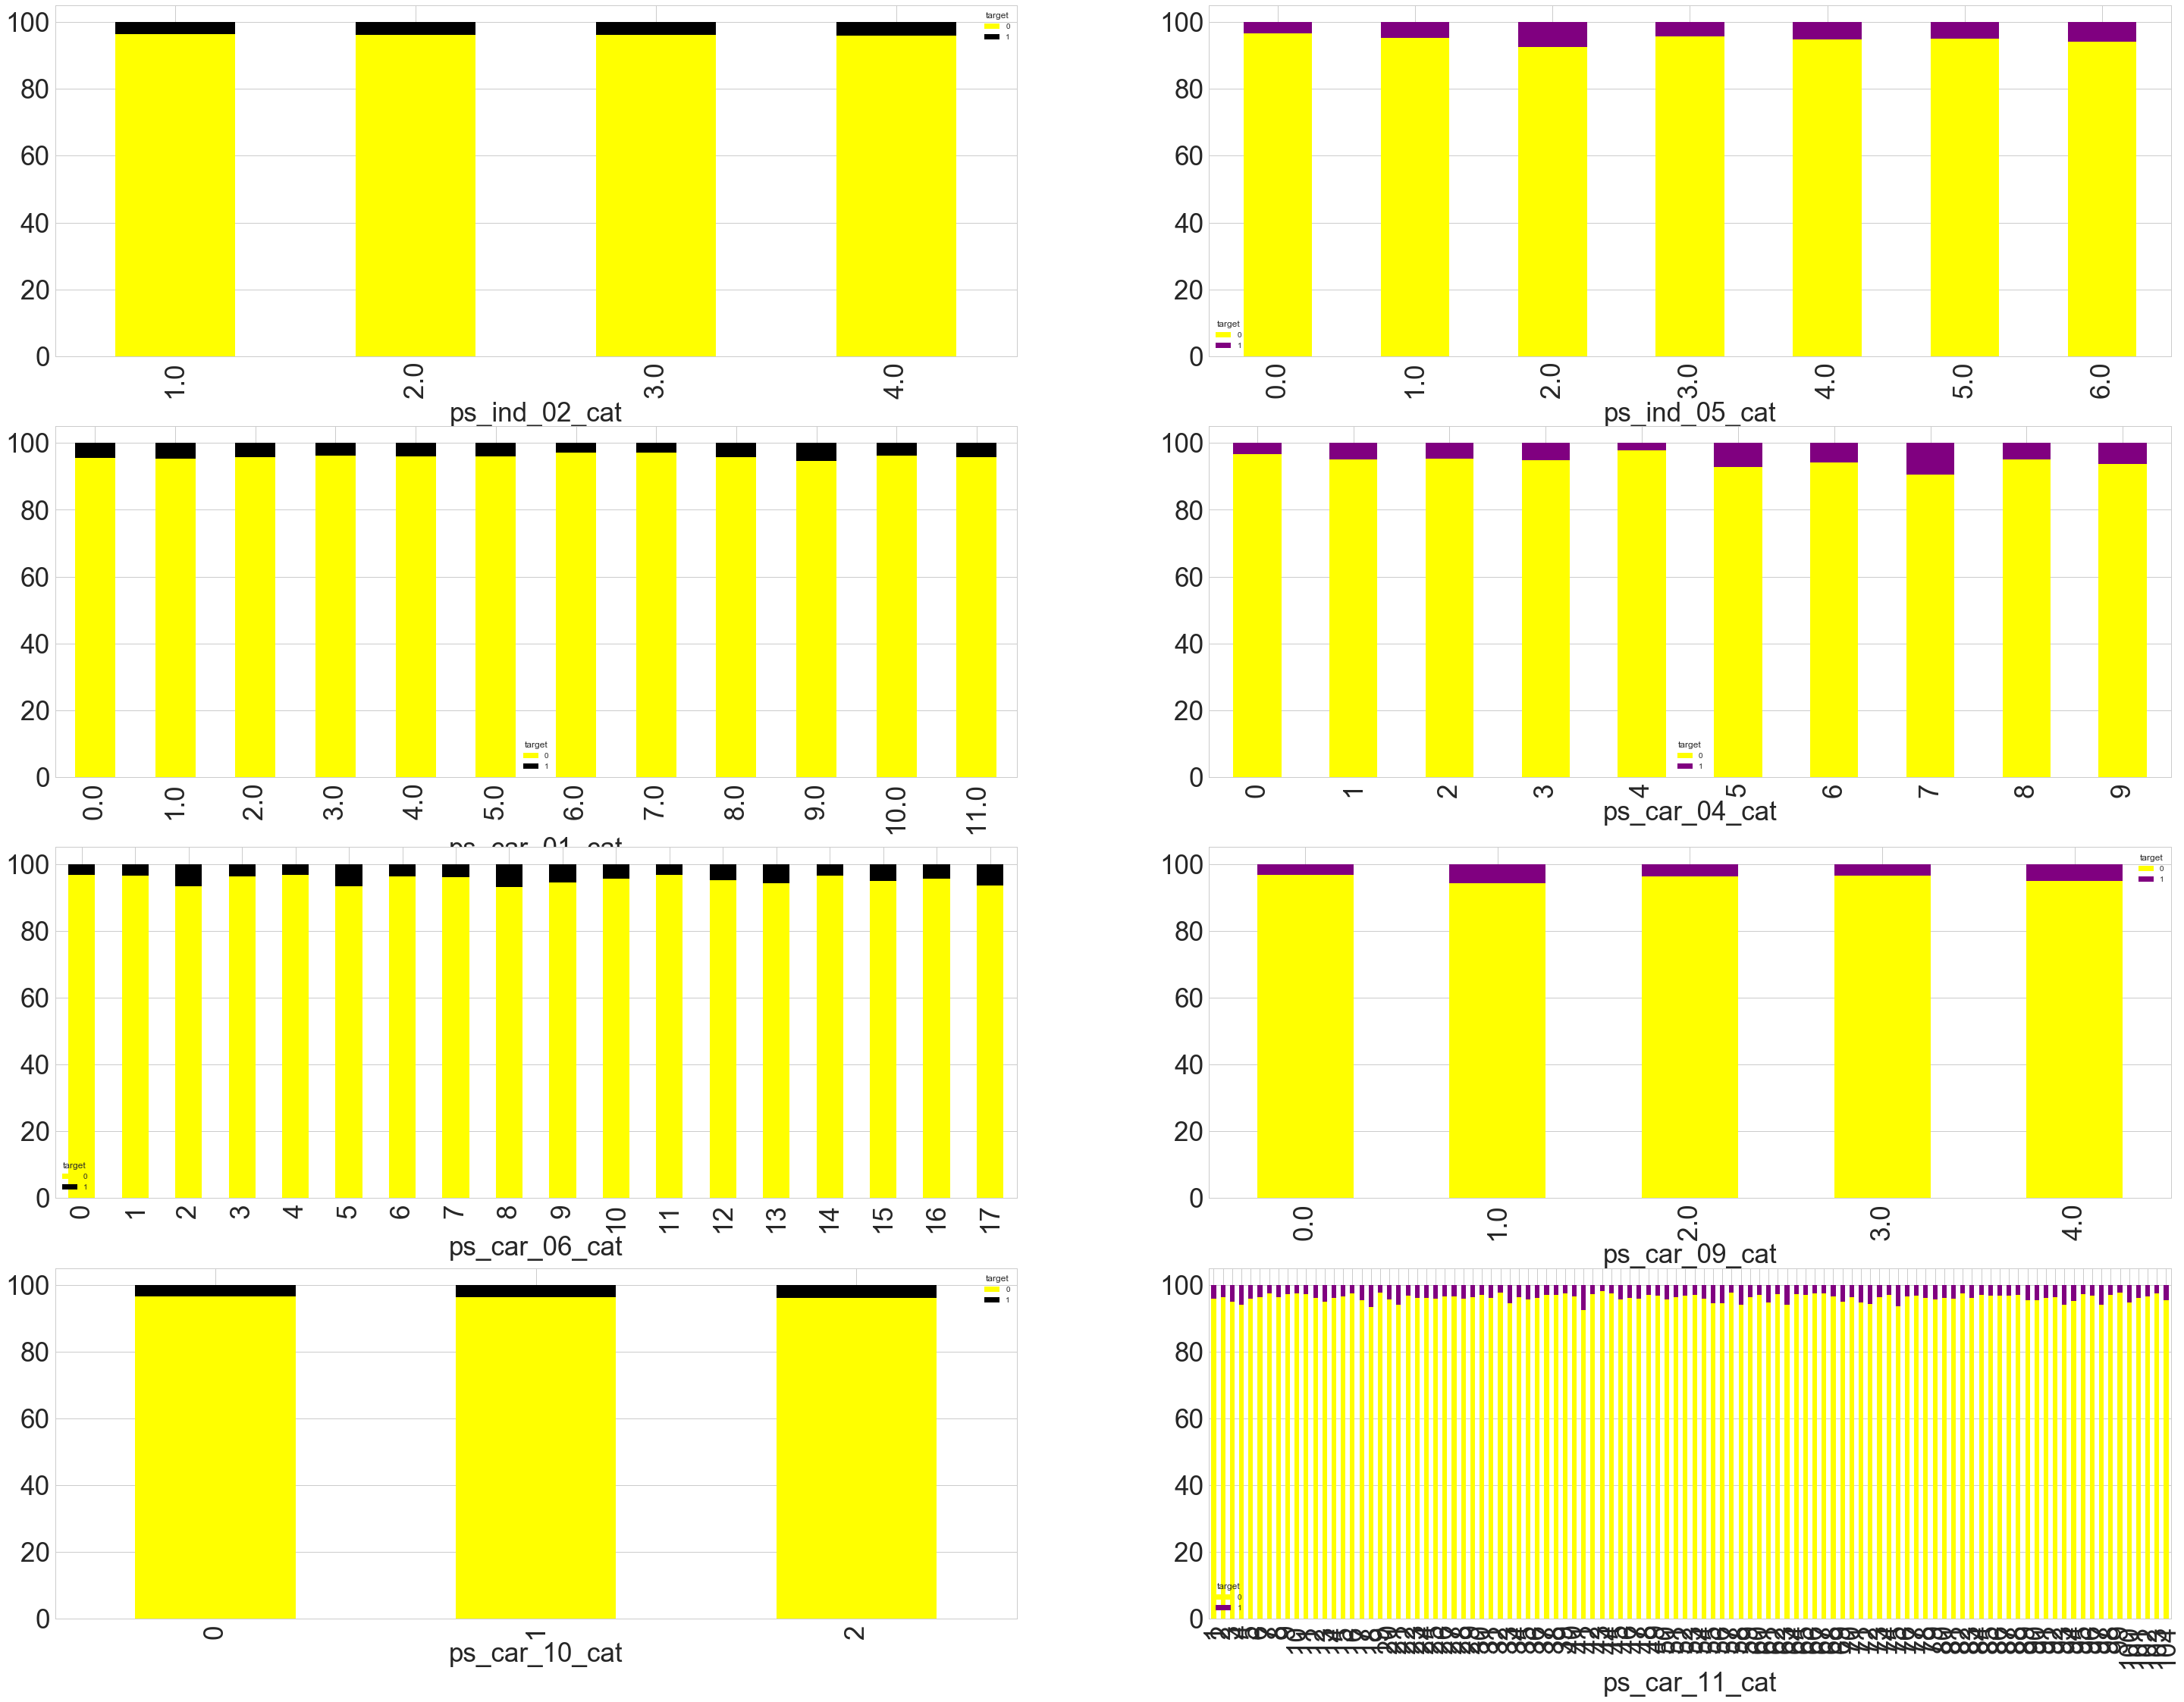

In [15]:
cat2=["ps_ind_02_cat", "ps_ind_05_cat", "ps_car_01_cat", "ps_car_04_cat", "ps_car_06_cat", "ps_car_09_cat", 
     "ps_car_10_cat","ps_car_11_cat"]
fig=plt.figure(figsize=(50,80))
count=[]
for i, plot_vars in enumerate(cat2):
    ax=fig.add_subplot(8,2,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(drivers[plot_vars],drivers["target"]).apply(lambda r: r/r.sum()*100, axis=1)
    if i%2==0:
        counts.plot.bar(color=["yellow",'black'],stacked=True,ax=ax)
    else:
        counts.plot.bar(color=["yellow",'purple'],stacked=True,ax=ax)
    count.append(counts)
plt.show()

In [16]:
multi_column_df_display(count)

target,0,1
ps_ind_02_cat,,
1.0,96.427538,3.572462
2.0,96.186060,3.813940
3.0,96.278294,3.721706
4.0,95.921955,4.078045
target,0,1
ps_ind_05_cat,,
0.0,96.613505,3.386495
1.0,95.217496,4.782504
2.0,92.447419,7.552581


We can see that most of the nominal categorical variables can turn out useful except ps_car_10_cat which doesn't have much variation.

Following variables have small percentage of missing values:

ps_car_09_cat, ps_car_02_cat, ps_car_01_cat, ps_ind_05_cat, ps_ind_02_cat

We will replace them with the most frequent category.

In [17]:
imp=Imputer(missing_values="NaN", strategy="most_frequent")
imp.fit(drivers[["ps_car_09_cat"]])
drivers["ps_car_09_cat"]=imp.transform(drivers[["ps_car_09_cat"]]).ravel()
imp.fit(drivers[["ps_car_02_cat"]])
drivers["ps_car_02_cat"]=imp.transform(drivers[["ps_car_02_cat"]]).ravel()
imp.fit(drivers[["ps_car_01_cat"]])
drivers["ps_car_01_cat"]=imp.transform(drivers[["ps_car_01_cat"]]).ravel()
imp.fit(drivers[["ps_ind_05_cat"]])
drivers["ps_ind_05_cat"]=imp.transform(drivers[["ps_ind_05_cat"]]).ravel()
imp.fit(drivers[["ps_ind_02_cat"]])
drivers["ps_ind_02_cat"]=imp.transform(drivers[["ps_ind_02_cat"]]).ravel()

### Plot ordinal variables

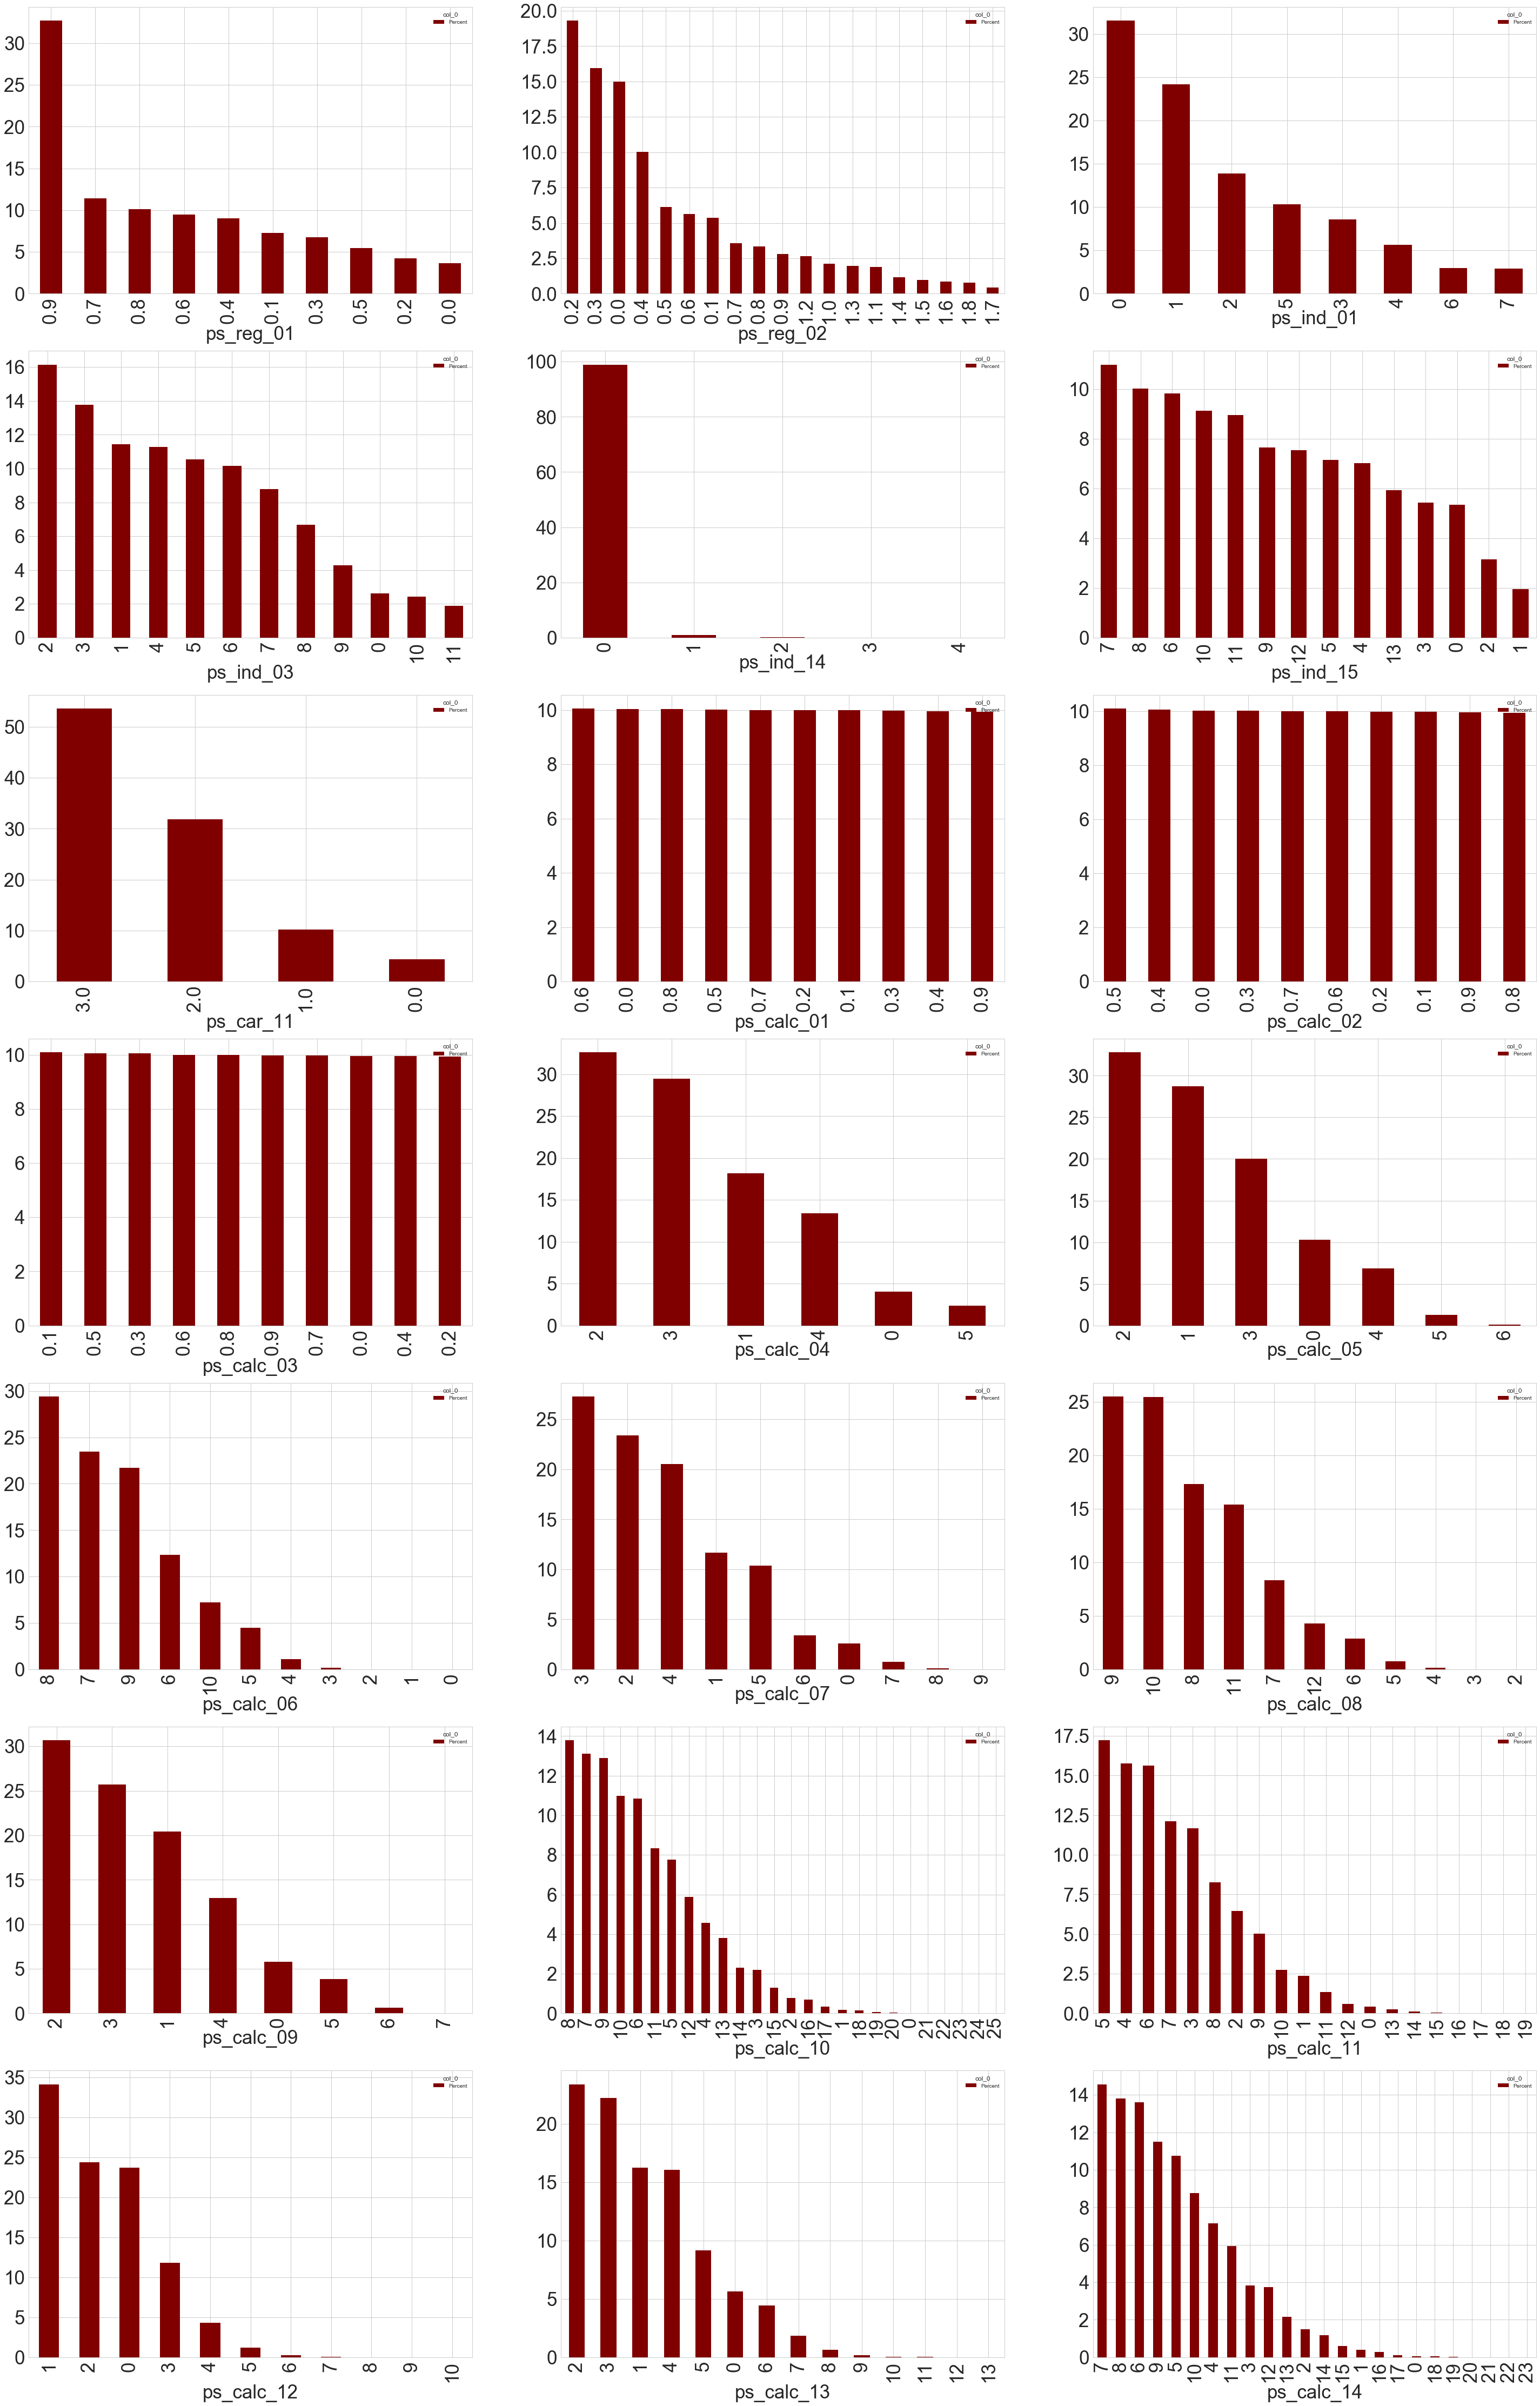

In [18]:
#plot ordinal variables
ordinal=['ps_reg_01', 'ps_reg_02', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_calc_01', 'ps_calc_02',
         'ps_calc_03', 'ps_calc_04','ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 
         'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']
fig=plt.figure(figsize=(50,80))
for i, plot_vars in enumerate(ordinal):
    ax=fig.add_subplot(len(ordinal)/3,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(index=drivers[plot_vars], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
    
    counts.plot.bar(color="maroon",ax=ax)
    #print(counts)
plt.show()

We can see that some of these variables are balanced and some are highly unbalanced.

Let's have at variation of these variables across the target variable.

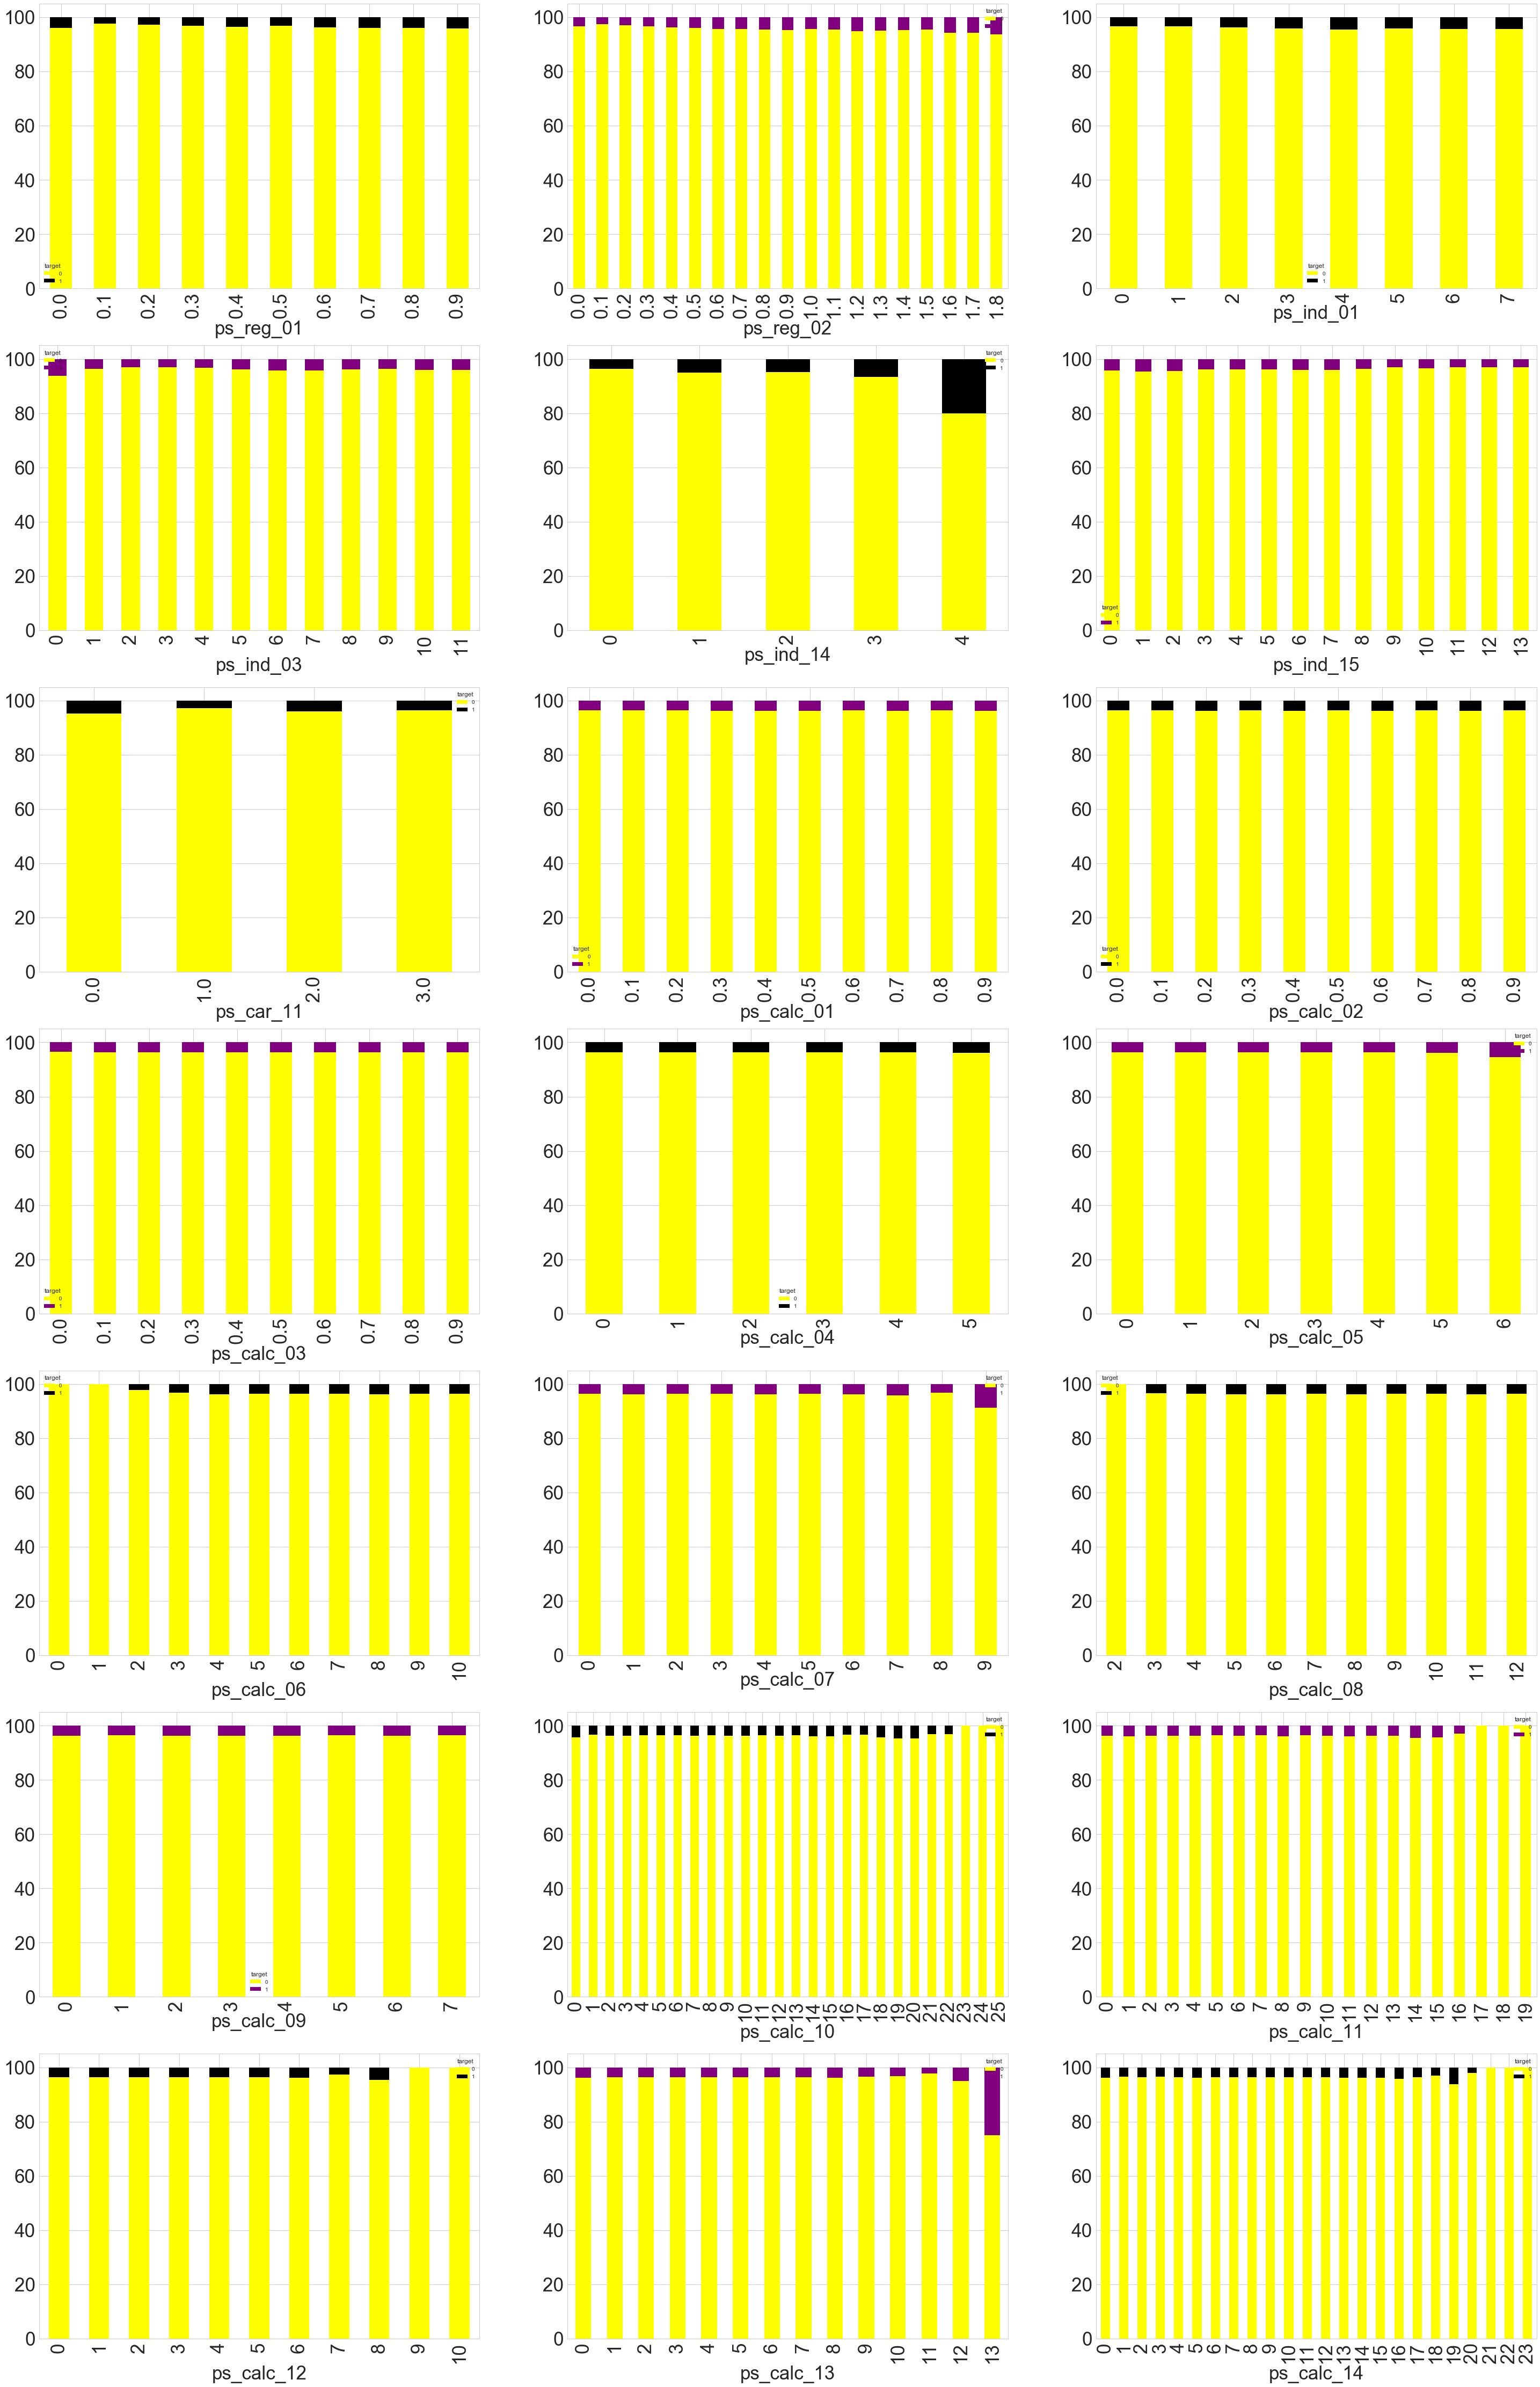

In [19]:
fig=plt.figure(figsize=(50,80))
count=[]
for i, plot_vars in enumerate(ordinal):
    ax=fig.add_subplot(len(ordinal)/3,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(drivers[plot_vars],drivers["target"]).apply(lambda r: r/r.sum()*100, axis=1)
    if i%2==0:
        counts.plot.bar(color=["yellow",'black'],stacked=True,ax=ax)
    else:
        counts.plot.bar(color=["yellow",'purple'],stacked=True,ax=ax)
    count.append(counts)
plt.show()

In [20]:
multi_column_df_display(count)

target,0,1
ps_reg_01,,
0.0,96.075085,3.924915
0.1,97.617614,2.382386
0.2,97.268347,2.731653
0.3,96.808141,3.191859
0.4,96.550244,3.449756
0.5,96.883213,3.116787
0.6,96.381772,3.618228
0.7,96.138268,3.861732
0.8,96.144466,3.855534


We can see that some categories have a lot variation in submitted claims. And some variables almost don't have any variation. Such variables are:

ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04,ps_calc_09.

And of course we always should keep in mind that we have a lot of highly unbalanced variables. For this reason we'll use spectial tools to find the most usefull variables for model building.

ps_car_11 has some missing values. We'll replace them with the most frequent category.

In [21]:
imp.fit(drivers[["ps_car_11"]])
drivers["ps_car_11"]=imp.transform(drivers[["ps_car_11"]]).ravel()

### Continuous variables

Let's print first few rows of each continuous variable to be sure it is continuous.

In [22]:
contin=['ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']
drivers[contin].head(n=20)

,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,0.718070,0.400000,0.883679,0.370810,3.605551
1,0.766078,0.316228,0.618817,0.388716,2.449490
2,NaN,0.316228,0.641586,0.347275,3.316625
3,0.580948,0.374166,0.542949,0.294958,2.000000
4,0.840759,0.316070,0.565832,0.365103,2.000000
5,2.332649,0.445982,0.879049,0.406202,3.000000
6,0.617454,0.316228,0.639683,0.368782,3.162278
7,0.607248,0.446990,0.900574,0.374833,3.316625
8,0.901388,0.400000,0.780641,0.407431,2.828427
9,2.316652,0.447214,1.458184,0.390256,3.605551


Because now we are sure that this is continuous variables we will plot them.

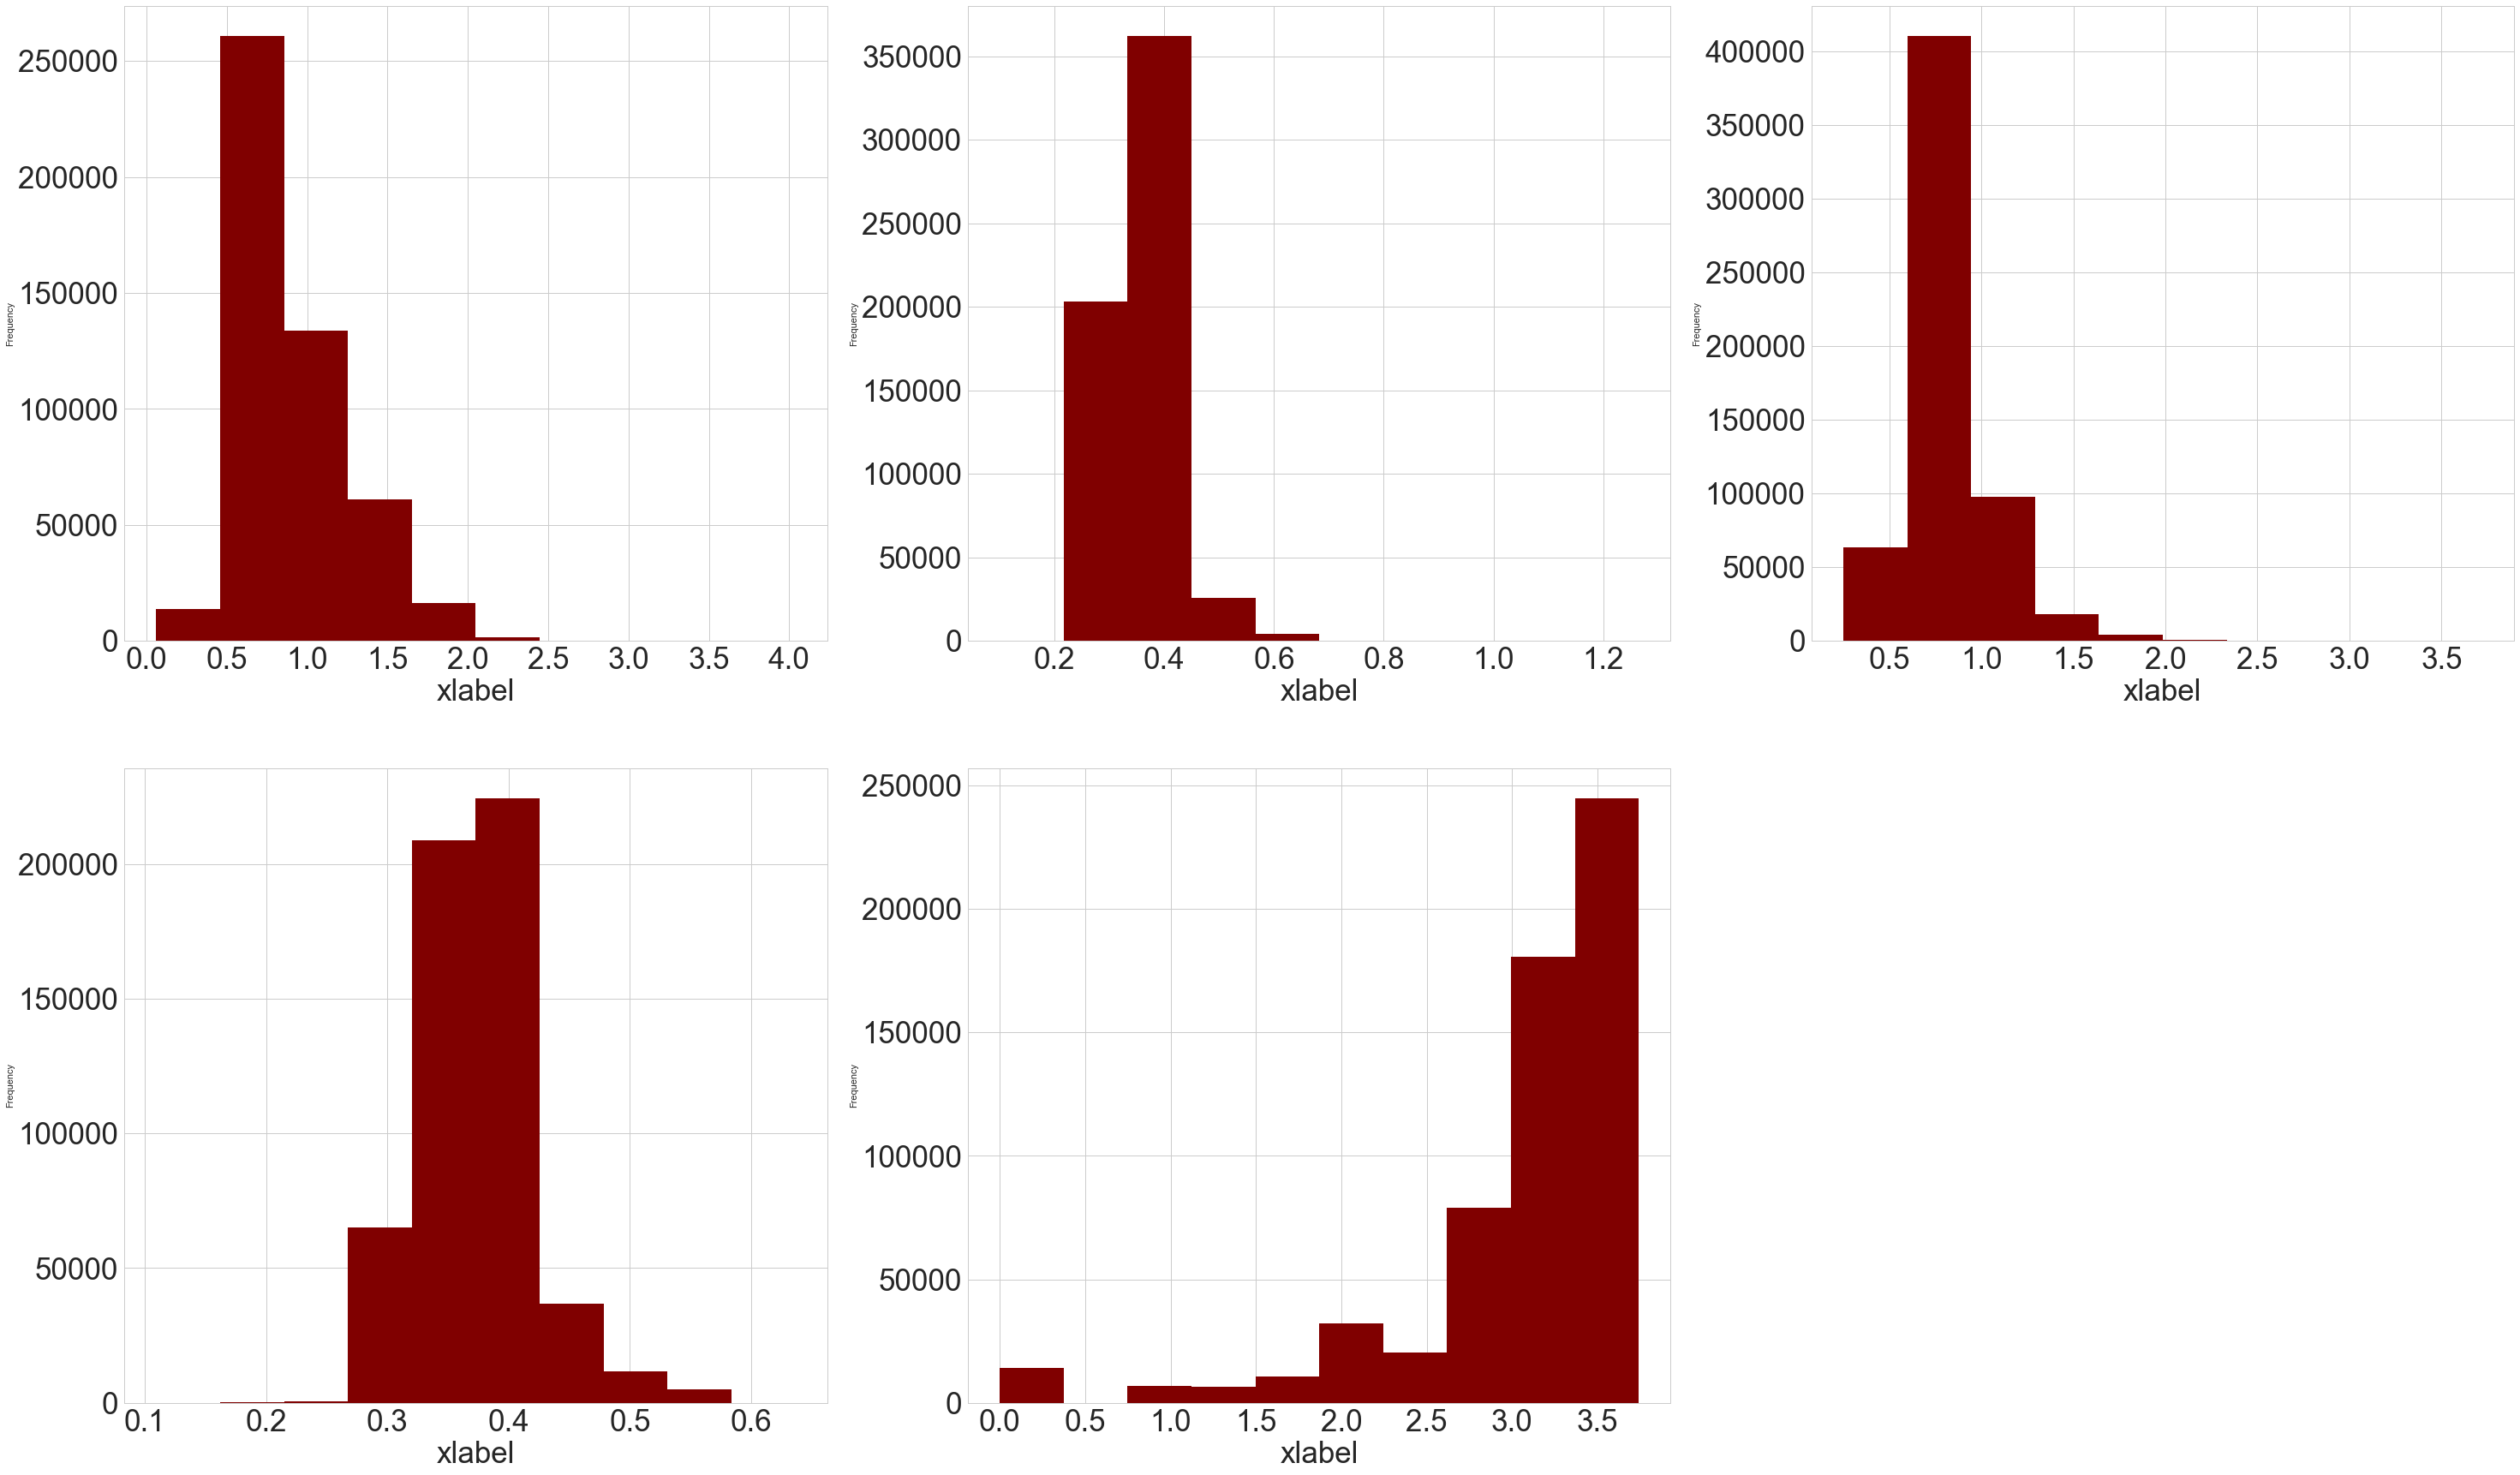

In [33]:
fig=plt.figure(figsize=(50,30))
for i, plot_vars in enumerate(contin):
    ax=fig.add_subplot(2,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    
    drivers[plot_vars].plot.hist(color="maroon",ax=ax)
    #print(counts)
plt.show()

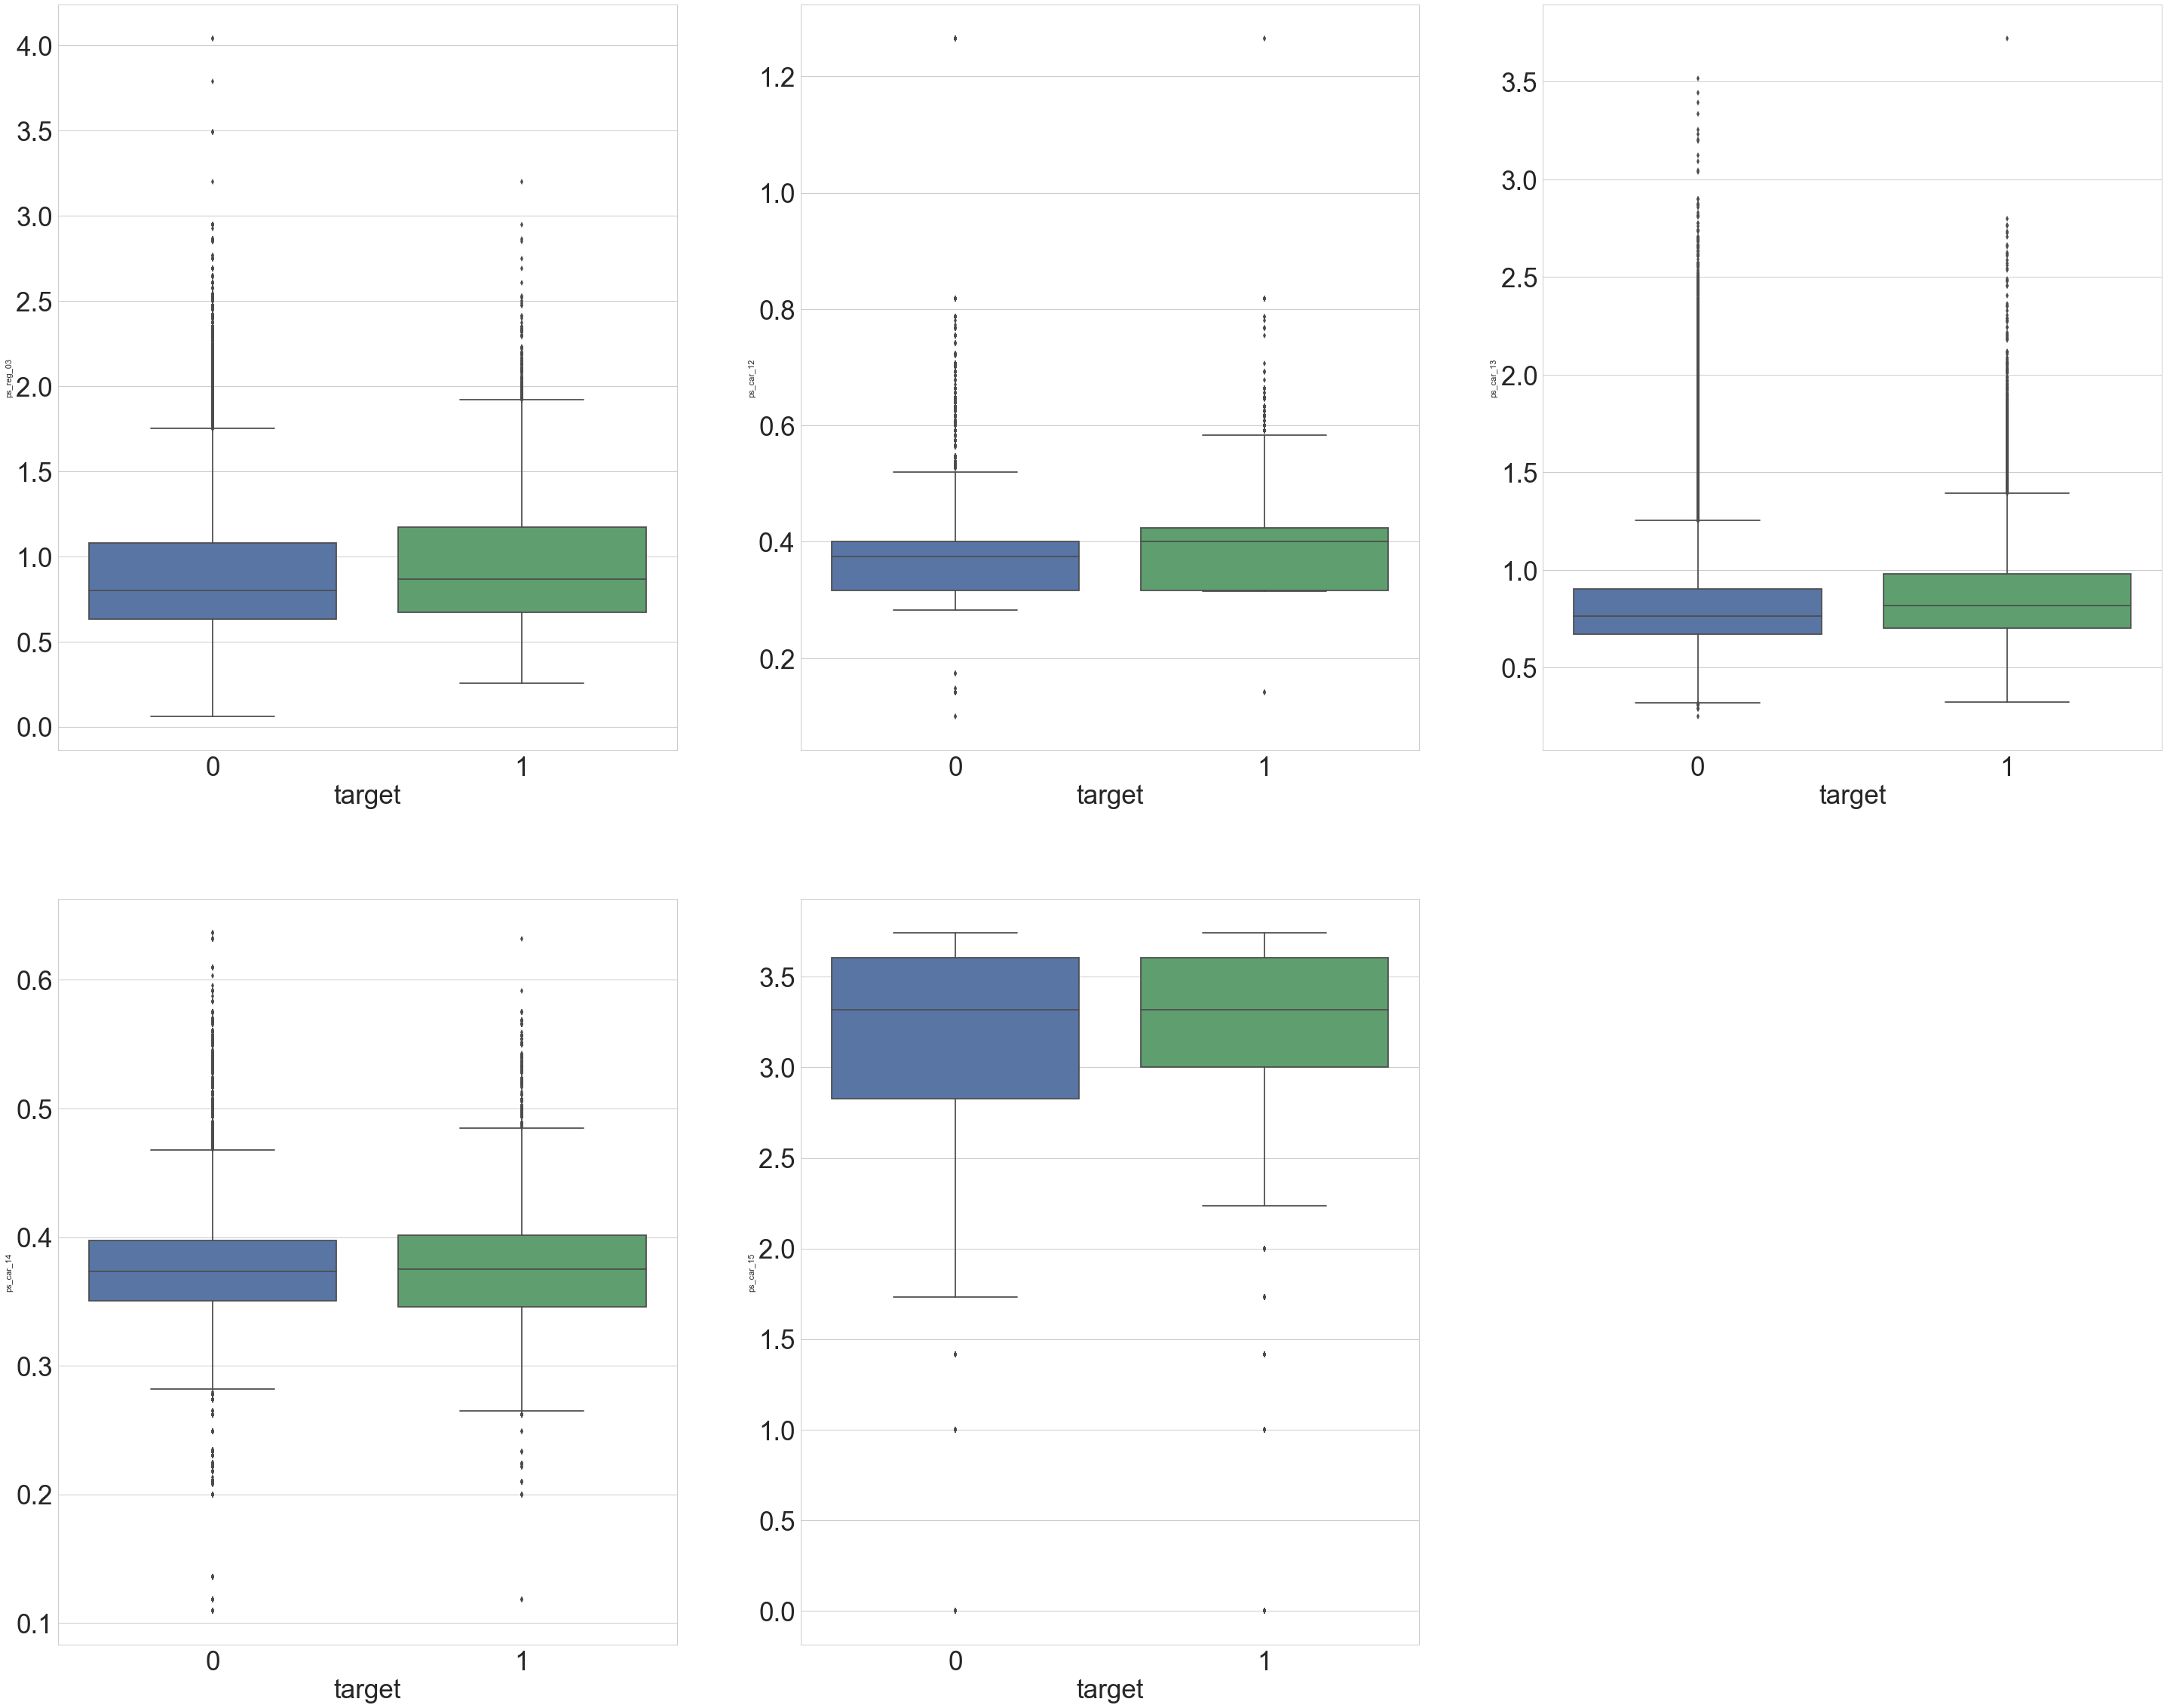

In [42]:
fig=plt.figure(figsize=(50,40))
for i, plot_vars in enumerate(contin):
    ax=fig.add_subplot(2,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    sns.boxplot(x="target", y=plot_vars, data=drivers)
plt.show()

We can see that distribution of this variables are highly skewed. That's why we have so many outliers. We'll need to normolize and scale them. But before this we need to impute missing values with the median value because median is better measure for skewed distribution than mean.

In [24]:
imp=Imputer(missing_values="NaN", strategy="median")
imp.fit(drivers[["ps_car_12"]])
drivers["ps_car_12"]=imp.transform(drivers[["ps_car_12"]]).ravel()
imp.fit(drivers[["ps_car_14"]])
drivers["ps_car_14"]=imp.transform(drivers[["ps_car_14"]]).ravel()

Variable ps_reg_03 contains about 18% of missing values. For this reason let's have a look if it is the target variable has variation across it.

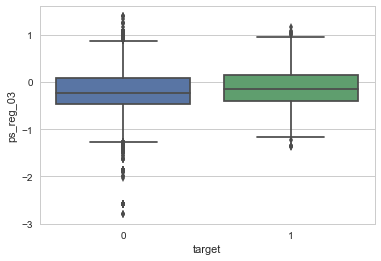

In [28]:
sns.boxplot(x="target", y="ps_reg_03", data=drivers)

We can see that at level 0 of target variable this variable has more variation and outliers. Also, the median of this variable for target level 1 is slightly higher than for value 0. But because we have a lot of missing points, high variation and not too much different mean across levels, it doesn't worth to build regression for prediction of this missing variable. So we will not include it in model.

# We can use this variable for regression!!! Plus we can build several classification models

In [25]:
new_con=['ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']
drivers[contin][drivers[contin]==0]=0.000001
drivers[contin]=np.log(drivers[contin])
drivers[contin]=preprocessing.scale(drivers[contin])


C:\Users\25355\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\25355\Anaconda3\lib\site-packages\pandas\core\frame.py:2366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
C:\Users\25355\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
plt.figure()
drivers["ps_car_13"].plot.hist()

### Let's make variables an appropriate type

#make the variable an apropriate type
drivers[cat]=Categorical(drivers[cat],ordered=False)
drivers[binary]=Categorical(drivers[binary],ordered=False)
drivers[ordinal]=Categorical(drivers[ordinal],ordered=True)

In [ ]:
# Replace missing values to NaN
drivers = drivers.replace(to_replace=-1,value=np.nan)
#Percent of missing values in dataset
missVal=drivers.isnull().sum()*100/len(drivers)
missVal.iloc[missVal.nonzero()]

We have some missing values in categorical features ps_ind_02_cat, ps_ind_04_cat, ps_ind_05_cat, ps_car_01_cat, ps_car_02_cat  , ps_car_03_cat, ps_car_05_cat, ps_car_07_cat, ps_car_09_cat. And some missing values in the following features which can be either ordinal or contineous ps_reg_03, ps_car_11, ps_car_12, ps_car_14. 

ps_car_11 must be categorical ordinal feature because it has interger values.
ps_reg_03, ps_car_12, ps_car_14 must be contineous features. Because they have long float points numbers.

The features containing "cat" at the end - are categorical features. The features containing "bin" at the end are binary features. Let's make all this features a categorical type.